# 🧠 Ulasan pada X — BERT Fine-Tuning untuk Klasifikasi dan Analisis Aspek/Topic Menggunakan BERTopic (TensorFlow)

Penelitian ini bertujuan untuk **melakukan fine-tuning pada model *IndoBERT*** guna melakukan **klasifikasi sentimen serta identifikasi aspek yang sering dibahas** dalam ulasan pengguna terhadap aplikasi *X*.  
Model yang digunakan merupakan *pre-trained model* bahasa Indonesia yang dikembangkan oleh **B. Wilie et al. (2020)**, yaitu **IndoBERT**, yang telah terbukti efektif dalam berbagai tugas *Natural Language Processing (NLP)* berbahasa Indonesia.  

Pendekatan ini memanfaatkan kemampuan *transformer architecture* dalam memahami konteks semantik antar kata untuk mengklasifikasikan sentimen (*positif dan negatif*) dan mengevaluasi kinerjanya dengan metrik **akurasi, presisi, recall, dan F1-score**.  
Selanjutnya, analisis aspek dilakukan menggunakan **BERTopic**, yang berbasis *transformer embeddings* dan *clustering* untuk mengidentifikasi topik utama yang sering muncul dalam ulasan pengguna.  

---

### 🎯 Tujuan Penelitian
1. Melakukan *fine-tuning* model **IndoBERT-base-p2** menggunakan dataset ulasan aplikasi X.  
2. Melakukan klasifikasi sentimen (positif, negatif, netral) berdasarkan hasil *fine-tuning*.  
3. Mengevaluasi performa model dengan **akurasi, presisi, recall, dan F1-score**.  
4. Mengidentifikasi topik dan aspek yang sering dibahas menggunakan **BERTopic**.  

---

### 🧩 Tahapan Penelitian
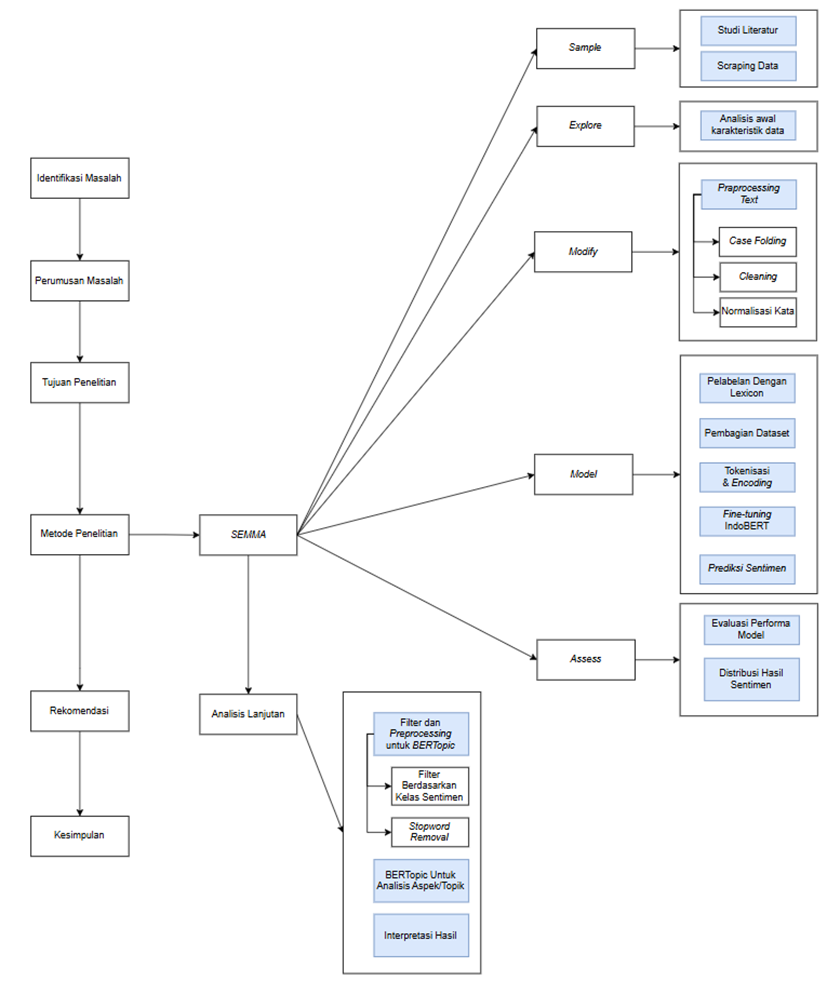
---

> **Referensi:**  
> Wilie, B., et al. (2020). *IndoNLU: Benchmark and Resources for Evaluating Indonesian Natural Language Understanding.*  
> arXiv: [2009.05387](https://arxiv.org/abs/2009.05387)  
> Model: [https://huggingface.co/indobenchmark/indobert-base-p2](https://huggingface.co/indobenchmark/indobert-base-p2)


# 🧩 1. Sample

Tahap **Sample** merupakan langkah awal dalam metodologi **SEMMA** yang berfokus pada proses pengumpulan dan pemilihan data yang relevan dengan tujuan penelitian.  
Tujuannya adalah memperoleh data yang representatif agar hasil analisis dapat mencerminkan persepsi pengguna secara akurat.

---

### 🔹 1. Studi Literatur
Dilakukan untuk memahami teori dan penelitian terdahulu terkait:
- Analisis sentimen menggunakan *IndoBERT*.
- Teknik *fine-tuning* model bahasa.
- Pendekatan analisis topik menggunakan **BERTopic**.  
Tahapan ini menjadi dasar dalam merancang kerangka dan metodologi penelitian.

---

### 🔹 2. Scraping Data
Data dikumpulkan secara otomatis menggunakan *Apify*.  
Melalui platform ini, sistem melakukan pengambilan data tweet berbasis kata kunci yang relevan dengan topik penelitian. Proses ekstraksi berjalan secara terjadwal dan terstruktur, sehingga seluruh tweet yang memenuhi kriteria akan dihimpun dan disimpan dalam format CSV untuk kemudian diproses pada tahap preprocessing.


### Mencari Data Menggunakan Apify

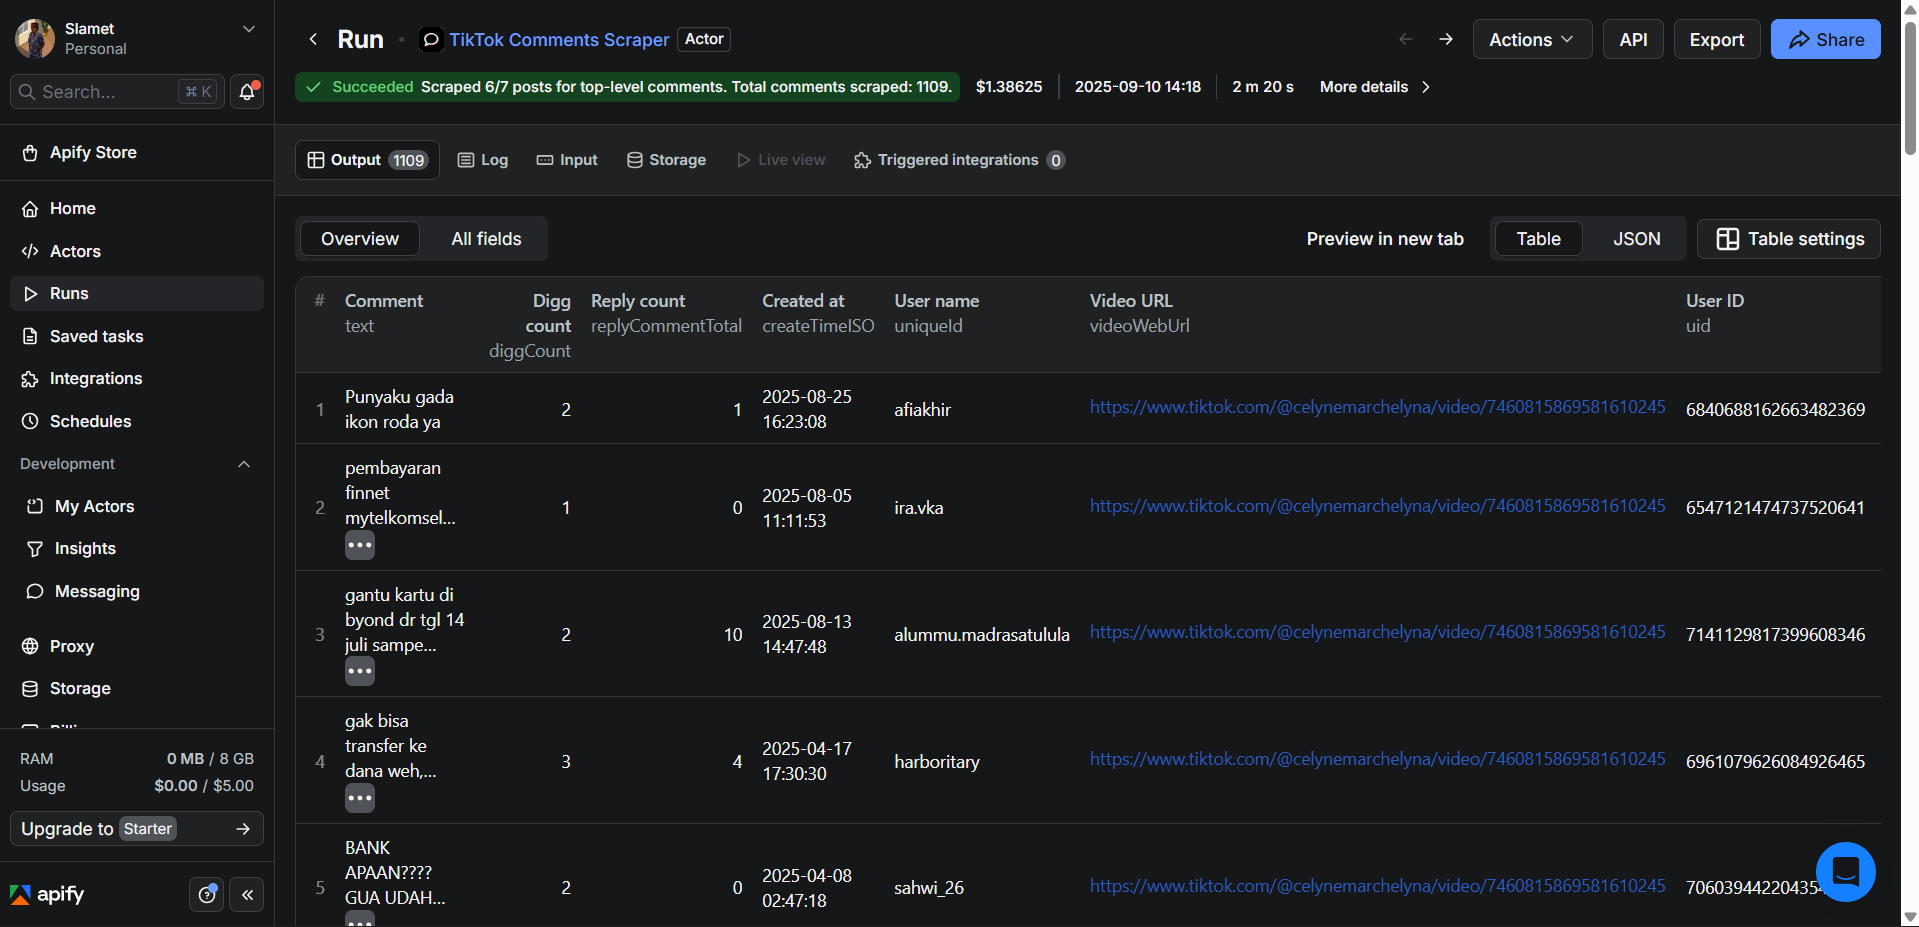

# 🔍 2. Explore

Tahapan Explore berfokus pada analisis awal terhadap karakteristik data hasil scraping menggunakan layanan Apify. Pada tahap ini dilakukan pemeriksaan struktur dataset, distribusi awal sentimen, serta identifikasi pola umum dalam teks seperti frekuensi kata, kemunculan hashtag, dan karakteristik linguistik lainnya.

Tujuannya adalah memperoleh pemahaman mengenai kondisi, kualitas, dan potensi masalah pada data sebelum memasuki tahap preprocessing dan pemodelan.


In [2]:
import pandas as pd

# Membaca file CSV langsung dari direktori saat ini
df = pd.read_csv("merge_data_tiktok.csv", delimiter=",")

df = df.rename(columns={'text': 'full_text', 'createTimeISO': 'created_at'})
display(df.head())

,full_text,diggCount,replyCommentTotal,created_at,uniqueId,videoWebUrl,uid,cid,avatarThumbnail
0,"gedung elit, jaringan sulit.",216,4,2025-02-11T01:51:33.000Z,serigalaterakhir1992,https://www.tiktok.com/@almuntazar88/video/746...,7075660736077431809,7469973143579869970,https://p16-common-sign-sg.tiktokcdn-us.com/to...
1,udah mending Bri aja bri😭💔,2,0,2025-02-12T04:31:01.000Z,ratuu2387,https://www.tiktok.com/@almuntazar88/video/746...,6955668094388831234,7470385425052467976,https://p16-common-sign-sg.tiktokcdn-us.com/to...
2,mau ngeluh tapi cuman satu satunya bank syaria...,2,0,2025-02-12T16:48:07.000Z,bruryrosally,https://www.tiktok.com/@almuntazar88/video/746...,6574176482527707137,7470575381385462535,https://p16-common-sign-va.tiktokcdn-us.com/to...
3,kembalikan BNI Syariah,2,0,2025-02-11T14:17:56.000Z,psikopat_kyy,https://www.tiktok.com/@almuntazar88/video/746...,6894988973790249985,7470165593074090770,https://p16-common-sign-useast2a.tiktokcdn-us....
4,tim yg masih punya apk BSI lama😂😂😂😂,151,50,2025-02-11T01:19:21.000Z,bunga.calathea24,https://www.tiktok.com/@almuntazar88/video/746...,7429593818242745350,7469964750065500948,https://p16-common-sign-va.tiktokcdn-us.com/to...


In [3]:
# Cek jumlah data awal
num_comment = len(df)
print(f"Jumlah ulasan tiktok dalam dataframe adalah {num_comment}.")

# Hapus duplikat berdasarkan kolom 'full_text'
df = df.drop_duplicates(subset=['full_text']).reset_index(drop=True)

# Cek jumlah data setelah remove duplicate
num_comment_clean = len(df)
print(f"Jumlah ulasan setelah menghapus duplikat adalah {num_comment_clean}.")

Jumlah ulasan tiktok dalam dataframe adalah 17854.
Jumlah ulasan setelah menghapus duplikat adalah 13993.


## 2.1 Melihat Data distribusi Tweet perbulan

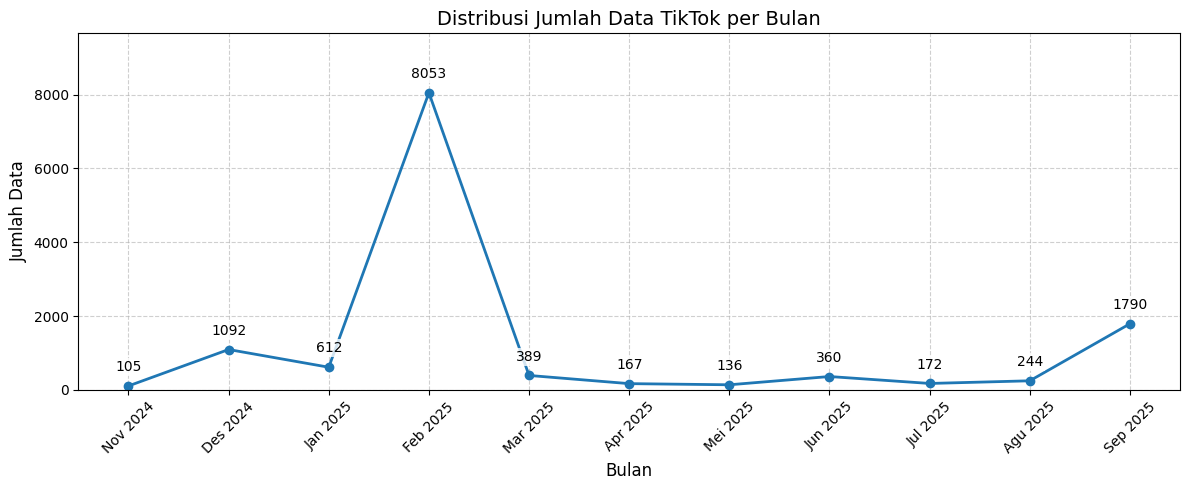

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# KONVERSI created_at KE DATETIME
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

# FILTER: hanya ambil data mulai 1 Nov 2024
df = df[df['created_at'] >= '2024-11-01']

# BUAT FORMAT BULAN (INDONESIA)
bulan_map_indo = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "Mei", 6: "Jun",
    7: "Jul", 8: "Agu", 9: "Sep", 10: "Okt", 11: "Nov", 12: "Des"
}

df['month_year'] = df['created_at'].dt.month.map(bulan_map_indo) + " " + df['created_at'].dt.year.astype(str)

# HITUNG JUMLAH DATA PER BULAN
monthly_counts = df['month_year'].value_counts().reset_index()
monthly_counts.columns = ['month_year', 'count']

# SORTING BERDASARKAN TANGGAL SEBENARNYA
bulan_indo_to_eng = {
    "Jan": "Jan", "Feb": "Feb", "Mar": "Mar", "Apr": "Apr",
    "Mei": "May", "Jun": "Jun", "Jul": "Jul", "Agu": "Aug",
    "Sep": "Sep", "Okt": "Oct", "Nov": "Nov", "Des": "Dec"
}

monthly_counts['month_eng'] = monthly_counts['month_year'].apply(
    lambda x: x.replace(x.split()[0], bulan_indo_to_eng[x.split()[0]])
)

monthly_counts['date_sort'] = pd.to_datetime(monthly_counts['month_eng'], format='%b %Y')
monthly_counts = monthly_counts.sort_values('date_sort')

# GRAFIK GARIS
plt.figure(figsize=(12, 5))
plt.plot(monthly_counts['month_year'], monthly_counts['count'], marker='o', linewidth=2)

plt.title("Distribusi Jumlah Data TikTok per Bulan", fontsize=14)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah Data", fontsize=12)
plt.xticks(rotation=45)

# OFFSET LABEL UNTUK SEMUA TITIK (agar tidak menabrak marker)
for i, count in enumerate(monthly_counts['count']):
    plt.text(
        i,
        count + (monthly_counts['count'].max() * 0.05),  # offset tetap berdasarkan nilai max
        str(count),
        ha='center',
        fontsize=10,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=1.5)
    )

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# TAMBAH RUANG DI ATAS
plt.ylim(0, monthly_counts['count'].max() * 1.20)

plt.show()

## 2.2 Memilih Kolom yang Diinginkan

In [5]:
# Pilih kolom 'full_text' dan 'created_at'
df_comment = df[['full_text', 'created_at']]

# Tampilkan dataframe yang sudah difilter
display(df_comment)

,full_text,created_at
0,"gedung elit, jaringan sulit.",2025-02-11 01:51:33+00:00
1,udah mending Bri aja bri😭💔,2025-02-12 04:31:01+00:00
2,mau ngeluh tapi cuman satu satunya bank syaria...,2025-02-12 16:48:07+00:00
3,kembalikan BNI Syariah,2025-02-11 14:17:56+00:00
4,tim yg masih punya apk BSI lama😂😂😂😂,2025-02-11 01:19:21+00:00
...,...,...
13988,"kk kartu bsi aku udah kadaluarsa, kalo misalny...",2025-08-27 05:08:07+00:00
13989,ERRORR sampe kapann🥺,2025-02-11 04:41:53+00:00
13990,"kak, di mutasi rekening skrg kok gk detail lg....",2025-02-07 05:20:08+00:00
13991,sukses selalu,2024-12-29 12:06:34+00:00


## 2.3 WordCloud dan Frekuensi Data

C:\Users\bayuw\AppData\Local\Temp\ipykernel_24704\3966521943.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comment['full_text'] = df_comment['full_text'].fillna('')


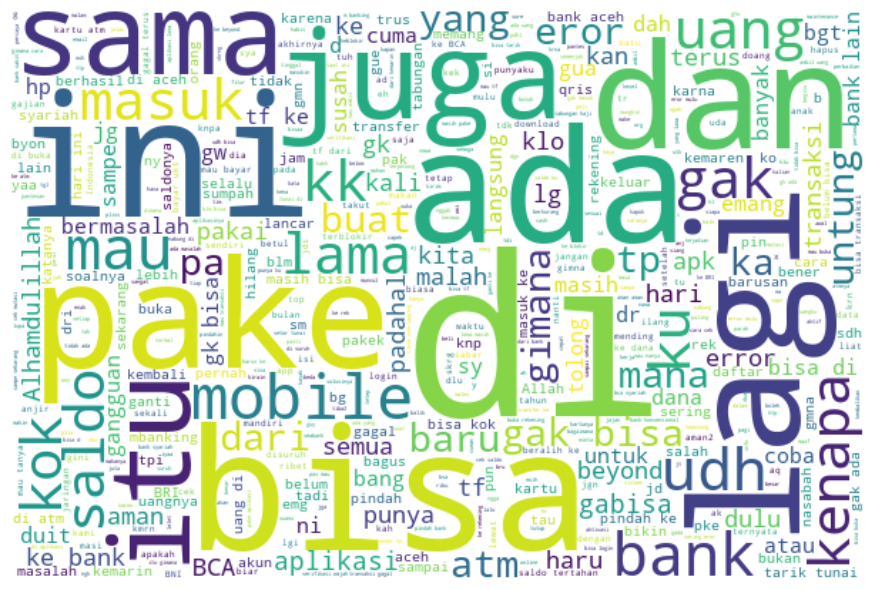

In [8]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Bersihkan kolom teks dari NaN
df_comment['full_text'] = df_comment['full_text'].fillna('')

# Gabungkan semua teks dari df_comment
text = ' '.join(df_comment['full_text'].astype(str).tolist())

# Stopwords bawaan + tambahan custom
stopwords = set(STOPWORDS)
custom_stopwords = [
    'https','co','RT','t','aja','ya','nih','nya','yg','min', 'saya',
    'logo','kak','kakak','minn','byond','bsi','bankbsi_id', 'aku',
    'sih','banget','tapi','deh','gitu','ga','iya','wkwk','wkwkwk',
    'haha','hehe','dong','loh','lah','kalo','kalau','udah','sudah',
    'ayo','apa','oke','okehh','okeh','jadi','demgan','cont','yaaa'
]
stopwords.update(custom_stopwords)

# Generate WordCloud
wc = WordCloud(
    stopwords=stopwords,
    background_color="white",
    max_words=500,
    width=600,
    height=400
)

wc.generate(text)

# Tampilkan hasil
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.show()

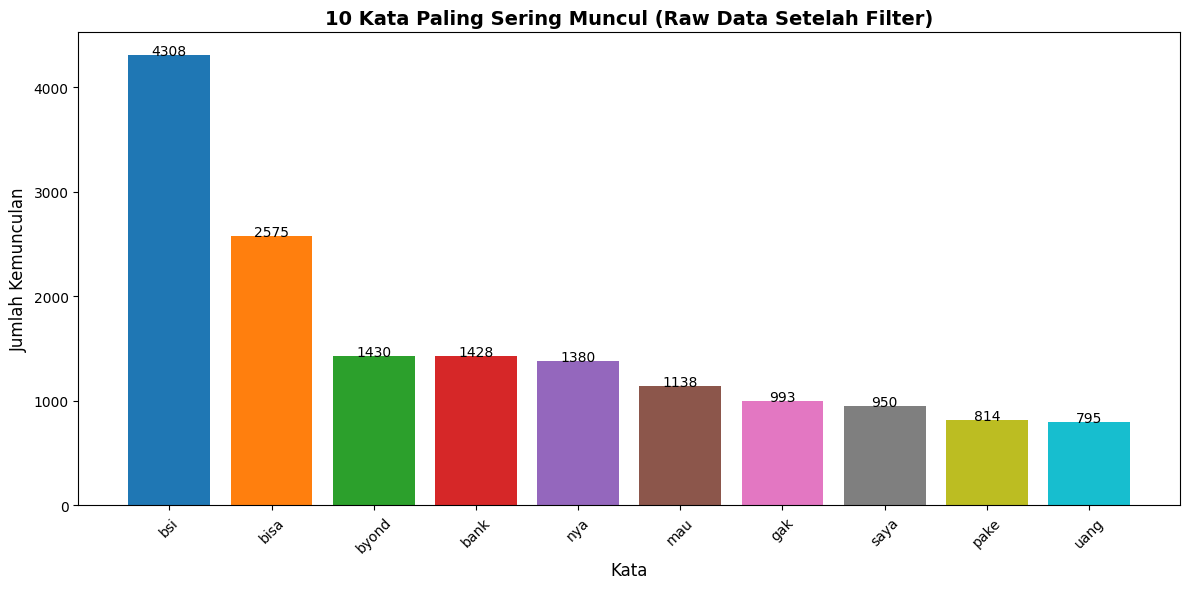

In [9]:
import matplotlib.pyplot as plt
from collections import Counter
import re

# Stopword dasar + tambahan khusus komentar
stopwords_basic = {
    'dan','yang','di','ke','dari','untuk','pada','atau','ini','itu',
    'dengan','karena','jadi','saja','tidak','ada','iya','sih','nih',
    'kok','pun','juga','udah','lagi','ayo','kak','kakak', 'aku',
    'rt','amp','co','https','aja','banget','dong','lah','loh','ya',
    'yaa','yah','oke','ok','gue','gua','gw','min','admin'
}

# Gabungkan semua teks X dari df_comment
all_text = " ".join(df_comment['full_text'].astype(str)).lower()

# Hapus simbol ringan
all_text = re.sub(r'[^\w\s]', ' ', all_text)
all_text = re.sub(r'\s+', ' ', all_text)

# Tokenisasi
tokens = all_text.split()

# Filter stopword, angka, kata <3 huruf, kata terlalu panjang
tokens = [
    t for t in tokens
    if t not in stopwords_basic
    and t.isalpha()
    and 3 <= len(t) <= 15
]

# Hitung 10 kata paling sering
top_words = Counter(tokens).most_common(10)
words, counts = zip(*top_words)

# Warna bar otomatis
colors = plt.cm.tab10(range(len(words)))

plt.figure(figsize=(12, 6))
bars = plt.bar(words, counts, color=colors)

plt.title("10 Kata Paling Sering Muncul (Raw Data Setelah Filter)", fontsize=14, fontweight='bold')
plt.xlabel("Kata", fontsize=12)
plt.ylabel("Jumlah Kemunculan", fontsize=12)
plt.xticks(rotation=45)

# Tambahkan label angka
for bar, num in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, num + 2, str(num),
             ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# ⚙️ 3. Modify

Tahapan **Modify** berfokus pada pembersihan dan penyeragaman teks sebelum digunakan dalam pemodelan.  
Langkah yang dilakukan mencakup:
- **Case Folding** → mengubah seluruh teks menjadi huruf kecil agar konsisten.  
- **Cleaning** → menghapus URL, angka, tanda baca, serta karakter yang tidak diperlukan menggunakan *regular expression*.  
- **Normalisasi Kata** → menstandarkan bentuk kata agar sesuai dengan struktur bahasa yang benar.  

Tahapan ini memastikan data teks telah bersih, seragam, dan siap digunakan dalam tahap pelatihan model *IndoBERT*.

📚 Library yang Digunakan pada Tahap Modify

Pada tahap *Modify*, digunakan beberapa *library* utama untuk mendukung proses pembersihan dan penyeragaman teks sebelum dilakukan pelatihan model *IndoBERT*.  

Library yang digunakan meliputi:  
- **Pandas** → untuk membaca, mengelola, dan memanipulasi dataset dalam bentuk *DataFrame*, sehingga memudahkan pengolahan teks secara terstruktur.  
- **NumPy** → digunakan untuk operasi numerik serta mendukung manajemen array pada proses transformasi teks.  
- **re (Regular Expression)** → untuk melakukan proses *cleaning*, seperti menghapus URL, angka, tanda baca, simbol, dan karakter tidak relevan dari teks.  
- **string** → digunakan untuk menghapus tanda baca dan karakter khusus pada tahap *cleaning*.  

Kombinasi *library* tersebut memastikan proses *case folding*, *cleaning*, dan *normalisasi kata* berjalan efisien sehingga menghasilkan teks yang bersih, seragam, dan siap digunakan dalam tahap pelatihan model *IndoBERT*.

In [ ]:
!pip install pandas numpy

In [10]:
import pandas as pd
import numpy as np
import re
import string

##  3.1 Case Folding

In [11]:
# Pastikan df_comment adalah copy
df_comment = df_comment.copy()

# Mengganti nama kolom 'full_text' menjadi 'comment'
df_comment = df_comment.rename(columns={'full_text': 'comment'})

# Membuat kolom baru hasil case folding
df_comment['case_folding'] = df_comment['comment'].astype(str).str.lower()

# Urutkan kolom agar rapi
df_comment = df_comment[['comment', 'case_folding']]

# Tampilkan 10 baris awal
df_comment.head(10)

,comment,case_folding
0,"gedung elit, jaringan sulit.","gedung elit, jaringan sulit."
1,udah mending Bri aja bri😭💔,udah mending bri aja bri😭💔
2,mau ngeluh tapi cuman satu satunya bank syaria...,mau ngeluh tapi cuman satu satunya bank syaria...
3,kembalikan BNI Syariah,kembalikan bni syariah
4,tim yg masih punya apk BSI lama😂😂😂😂,tim yg masih punya apk bsi lama😂😂😂😂
5,"gw punya uang 2M lebih,ga percaya bank manapun...","gw punya uang 2m lebih,ga percaya bank manapun..."
6,semoga bank konfensional kembali membuka caban...,semoga bank konfensional kembali membuka caban...
7,Gara gara kau BSI gagal beli oleh2.. kena beba...,gara gara kau bsi gagal beli oleh2.. kena beba...
8,sejak pakek bsi ni ketar ketir tb2 gak bisa na...,sejak pakek bsi ni ketar ketir tb2 gak bisa na...
9,untung masi punya apk bsi yg lama jadi aman😅,untung masi punya apk bsi yg lama jadi aman😅


##  3.2 Cleaning

In [12]:
import re

# Fungsi untuk menghapus username (@user)
def remove_username(text):
    if text is not None and isinstance(text, str):
        return re.sub(r'@[^\s]+', '', text)
    return text

# Fungsi untuk menghapus emoji
def remove_emoji(tweet):
    if tweet is not None and isinstance(tweet, str):
        emoji_pattern = re.compile(
            "["
            u"\U0001F600-\U0001F64F"
            u"\U0001F300-\U0001F5FF"
            u"\U0001F680-\U0001F6FF"
            u"\U0001F700-\U0001F77F"
            u"\U0001F780-\U0001F7FF"
            u"\U0001F800-\U0001F8FF"
            u"\U0001F900-\U0001F9FF"
            u"\U0001FA00-\U0001FA6F"
            u"\U0001FA70-\U0001FAFF"
            u"\U0001F004-\U0001F0CF"
            u"\U0001F1E0-\U0001F1FF"
            "]+",
            flags=re.UNICODE
        )
        return emoji_pattern.sub(r'', tweet)
    return tweet

# Fungsi untuk menghapus simbol
def remove_symbols(tweet):
    if tweet is not None and isinstance(tweet, str):
        return re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

# Fungsi untuk menghapus angka
def remove_numbers(tweet):
    if tweet is not None and isinstance(tweet, str):
        return re.sub(r'\d+', '', tweet)
    return tweet


# 🧩 Terapkan Cleaning (gunakan df_comment)
df_comment['cleaning'] = (
    df_comment['case_folding']
    .apply(remove_username)
    .apply(remove_emoji)
    .apply(remove_symbols)
    .apply(remove_numbers)
)

# 📋 Urutkan Kolom Agar Rapi
df_comment = df_comment[['comment', 'case_folding', 'cleaning']]

# 🔍 Tampilkan 10 baris awal
df_comment.head(10)

,comment,case_folding,cleaning
0,"gedung elit, jaringan sulit.","gedung elit, jaringan sulit.",gedung elit jaringan sulit
1,udah mending Bri aja bri😭💔,udah mending bri aja bri😭💔,udah mending bri aja bri
2,mau ngeluh tapi cuman satu satunya bank syaria...,mau ngeluh tapi cuman satu satunya bank syaria...,mau ngeluh tapi cuman satu satunya bank syaria...
3,kembalikan BNI Syariah,kembalikan bni syariah,kembalikan bni syariah
4,tim yg masih punya apk BSI lama😂😂😂😂,tim yg masih punya apk bsi lama😂😂😂😂,tim yg masih punya apk bsi lama
5,"gw punya uang 2M lebih,ga percaya bank manapun...","gw punya uang 2m lebih,ga percaya bank manapun...",gw punya uang m lebihga percaya bank manapunma...
6,semoga bank konfensional kembali membuka caban...,semoga bank konfensional kembali membuka caban...,semoga bank konfensional kembali membuka caban...
7,Gara gara kau BSI gagal beli oleh2.. kena beba...,gara gara kau bsi gagal beli oleh2.. kena beba...,gara gara kau bsi gagal beli oleh kena beban m...
8,sejak pakek bsi ni ketar ketir tb2 gak bisa na...,sejak pakek bsi ni ketar ketir tb2 gak bisa na...,sejak pakek bsi ni ketar ketir tb gak bisa nar...
9,untung masi punya apk bsi yg lama jadi aman😅,untung masi punya apk bsi yg lama jadi aman😅,untung masi punya apk bsi yg lama jadi aman


## 3.3 Normalisasi Kata

In [17]:
import sys
!"{sys.executable}" -m pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------

In [18]:
# Tahap Normalisasi Kata
import pandas as pd
import re

# Baca kamus kata baku dari file Excel
kamus = pd.read_excel("kamuskatabaku.xlsx")

# Normalisasi key agar selalu lowercase
kamus['tidak_baku'] = kamus['tidak_baku'].astype(str).str.lower()
kamus['kata_baku']   = kamus['kata_baku'].astype(str).str.lower()

# Buat dictionary normalisasi
kamus_dict = dict(zip(kamus['tidak_baku'], kamus['kata_baku']))

# Fungsi normalisasi teks
def normalize_text(text):
    if text is None or not isinstance(text, str):
        return text

    # Hilangkan spasi ganda
    text = re.sub(r'\s+', ' ', text).strip()

    if text == "":
        return text

    words = text.split()
    normalized_words = [kamus_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)

# Terapkan normalisasi pada kolom 'cleaning'
df_comment['normalisasi'] = df_comment['cleaning'].apply(normalize_text)

# Urutkan kolom agar rapi
df_comment = df_comment[['comment', 'case_folding', 'cleaning', 'normalisasi']]

# Tampilkan hasil
df_comment.head(10)

,comment,case_folding,cleaning,normalisasi
0,"gedung elit, jaringan sulit.","gedung elit, jaringan sulit.",gedung elit jaringan sulit,gedung elit jaringan sulit
1,udah mending Bri aja bri😭💔,udah mending bri aja bri😭💔,udah mending bri aja bri,sudah mending bri saja bri
2,mau ngeluh tapi cuman satu satunya bank syaria...,mau ngeluh tapi cuman satu satunya bank syaria...,mau ngeluh tapi cuman satu satunya bank syaria...,mau ngeluh tapi cuma satu satunya bank syariah...
3,kembalikan BNI Syariah,kembalikan bni syariah,kembalikan bni syariah,kembalikan bni syariah
4,tim yg masih punya apk BSI lama😂😂😂😂,tim yg masih punya apk bsi lama😂😂😂😂,tim yg masih punya apk bsi lama,tim yang masih punya aplikasi bsi lama
5,"gw punya uang 2M lebih,ga percaya bank manapun...","gw punya uang 2m lebih,ga percaya bank manapun...",gw punya uang m lebihga percaya bank manapunma...,gue punya uang sama lebihga percaya bank manap...
6,semoga bank konfensional kembali membuka caban...,semoga bank konfensional kembali membuka caban...,semoga bank konfensional kembali membuka caban...,semoga bank konfensional kembali membuka caban...
7,Gara gara kau BSI gagal beli oleh2.. kena beba...,gara gara kau bsi gagal beli oleh2.. kena beba...,gara gara kau bsi gagal beli oleh kena beban m...,gara gara kau bsi gagal beli oleh kena beban m...
8,sejak pakek bsi ni ketar ketir tb2 gak bisa na...,sejak pakek bsi ni ketar ketir tb2 gak bisa na...,sejak pakek bsi ni ketar ketir tb gak bisa nar...,sejak pakai bsi nih ketar ketir tb tidak bisa ...
9,untung masi punya apk bsi yg lama jadi aman😅,untung masi punya apk bsi yg lama jadi aman😅,untung masi punya apk bsi yg lama jadi aman,untung masih punya aplikasi bsi yang lama jadi...


## 3.4 Tokenisasi Kata

In [19]:
# Tahap Tokenisasi
import re

def tokenize(text):
    if text is None or not isinstance(text, str):
        return []
    tokens = re.findall(r'\b\w+\b', text)
    return tokens

# Terapkan tokenisasi pada kolom 'normalisasi'
df_comment['tokenisasi'] = df_comment['normalisasi'].apply(tokenize)

# Urutkan kolom agar rapi
df_comment = df_comment[['comment', 'case_folding', 'cleaning', 'normalisasi', 'tokenisasi']]

# Tampilkan 10 baris pertama
df_comment.head(10)

,comment,case_folding,cleaning,normalisasi,tokenisasi
0,"gedung elit, jaringan sulit.","gedung elit, jaringan sulit.",gedung elit jaringan sulit,gedung elit jaringan sulit,"[gedung, elit, jaringan, sulit]"
1,udah mending Bri aja bri😭💔,udah mending bri aja bri😭💔,udah mending bri aja bri,sudah mending bri saja bri,"[sudah, mending, bri, saja, bri]"
2,mau ngeluh tapi cuman satu satunya bank syaria...,mau ngeluh tapi cuman satu satunya bank syaria...,mau ngeluh tapi cuman satu satunya bank syaria...,mau ngeluh tapi cuma satu satunya bank syariah...,"[mau, ngeluh, tapi, cuma, satu, satunya, bank,..."
3,kembalikan BNI Syariah,kembalikan bni syariah,kembalikan bni syariah,kembalikan bni syariah,"[kembalikan, bni, syariah]"
4,tim yg masih punya apk BSI lama😂😂😂😂,tim yg masih punya apk bsi lama😂😂😂😂,tim yg masih punya apk bsi lama,tim yang masih punya aplikasi bsi lama,"[tim, yang, masih, punya, aplikasi, bsi, lama]"
5,"gw punya uang 2M lebih,ga percaya bank manapun...","gw punya uang 2m lebih,ga percaya bank manapun...",gw punya uang m lebihga percaya bank manapunma...,gue punya uang sama lebihga percaya bank manap...,"[gue, punya, uang, sama, lebihga, percaya, ban..."
6,semoga bank konfensional kembali membuka caban...,semoga bank konfensional kembali membuka caban...,semoga bank konfensional kembali membuka caban...,semoga bank konfensional kembali membuka caban...,"[semoga, bank, konfensional, kembali, membuka,..."
7,Gara gara kau BSI gagal beli oleh2.. kena beba...,gara gara kau bsi gagal beli oleh2.. kena beba...,gara gara kau bsi gagal beli oleh kena beban m...,gara gara kau bsi gagal beli oleh kena beban m...,"[gara, gara, kau, bsi, gagal, beli, oleh, kena..."
8,sejak pakek bsi ni ketar ketir tb2 gak bisa na...,sejak pakek bsi ni ketar ketir tb2 gak bisa na...,sejak pakek bsi ni ketar ketir tb gak bisa nar...,sejak pakai bsi nih ketar ketir tb tidak bisa ...,"[sejak, pakai, bsi, nih, ketar, ketir, tb, tid..."
9,untung masi punya apk bsi yg lama jadi aman😅,untung masi punya apk bsi yg lama jadi aman😅,untung masi punya apk bsi yg lama jadi aman,untung masih punya aplikasi bsi yang lama jadi...,"[untung, masih, punya, aplikasi, bsi, yang, la..."


## 3.5 Stopword Removal

In [21]:
import sys
!"{sys.executable}" -m pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 8.0 MB/s  0:00:00

   ---------------------------------------- 0/2 [click]
   ---------------------------------------- 0/2 [click]
   ---------------------------------------- 0/2 [click]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   -------------------- ------------------- 1/2 [nltk]
   ------------

In [22]:
# Tahap Stopword Removal
import nltk
from nltk.corpus import stopwords

# Download stopwords Indonesia (sekali saja)
nltk.download('stopwords')

# Stopword dasar NLTK
stop_words = set(stopwords.words('indonesian'))

# Stopword tambahan
custom_stopwords = {
    'bsi', 'byond', 'bank',
    'assalamualaikum', 'halo', 'hai',
    'kak', 'kakak', 'anda', 'kami', 'kita',
    'maaf', 'mohon', 'tolong',
    'info', 'informasi', 'cs', 'admin',
    'terimakasih', 'trimakasih', 'makasih'
}

stop_words.update(custom_stopwords)

# Penting: kata sentimen NEGATIF jangan dihapus
words_to_keep = {
    "tidak", "bukan", "kurang",
    "masalah", "pengaduan", "gagal", "error",
    "gangguan", "lambat", "buruk", "parah"
}

stop_words = stop_words - words_to_keep    # hapus kata ini dari stopword

# ungsi Stopword Removal versi aman
def remove_stopwords(tokens):
    if tokens is None:
        return tokens

    cleaned = []
    for word in tokens:
        if word not in stop_words and len(word) > 2:
            cleaned.append(word)
    return cleaned

# Terapkan ke dataframe
df_comment['stopword_removal'] = df_comment['tokenisasi'].apply(remove_stopwords)

# Kolom rapi
df_comment = df_comment[['comment',
                         'case_folding',
                         'cleaning',
                         'normalisasi',
                         'tokenisasi',
                         'stopword_removal']]

# Lihat hasil
df_comment.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bayuw\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,comment,case_folding,cleaning,normalisasi,tokenisasi,stopword_removal
0,"gedung elit, jaringan sulit.","gedung elit, jaringan sulit.",gedung elit jaringan sulit,gedung elit jaringan sulit,"[gedung, elit, jaringan, sulit]","[gedung, elit, jaringan, sulit]"
1,udah mending Bri aja bri😭💔,udah mending bri aja bri😭💔,udah mending bri aja bri,sudah mending bri saja bri,"[sudah, mending, bri, saja, bri]","[mending, bri, bri]"
2,mau ngeluh tapi cuman satu satunya bank syaria...,mau ngeluh tapi cuman satu satunya bank syaria...,mau ngeluh tapi cuman satu satunya bank syaria...,mau ngeluh tapi cuma satu satunya bank syariah...,"[mau, ngeluh, tapi, cuma, satu, satunya, bank,...","[ngeluh, satunya, syariah, bumn]"
3,kembalikan BNI Syariah,kembalikan bni syariah,kembalikan bni syariah,kembalikan bni syariah,"[kembalikan, bni, syariah]","[kembalikan, bni, syariah]"
4,tim yg masih punya apk BSI lama😂😂😂😂,tim yg masih punya apk bsi lama😂😂😂😂,tim yg masih punya apk bsi lama,tim yang masih punya aplikasi bsi lama,"[tim, yang, masih, punya, aplikasi, bsi, lama]","[tim, aplikasi]"
5,"gw punya uang 2M lebih,ga percaya bank manapun...","gw punya uang 2m lebih,ga percaya bank manapun...",gw punya uang m lebihga percaya bank manapunma...,gue punya uang sama lebihga percaya bank manap...,"[gue, punya, uang, sama, lebihga, percaya, ban...","[gue, uang, lebihga, percaya, manapunmakanya, ..."
6,semoga bank konfensional kembali membuka caban...,semoga bank konfensional kembali membuka caban...,semoga bank konfensional kembali membuka caban...,semoga bank konfensional kembali membuka caban...,"[semoga, bank, konfensional, kembali, membuka,...","[semoga, konfensional, membuka, cabangnya, ace..."
7,Gara gara kau BSI gagal beli oleh2.. kena beba...,gara gara kau bsi gagal beli oleh2.. kena beba...,gara gara kau bsi gagal beli oleh kena beban m...,gara gara kau bsi gagal beli oleh kena beban m...,"[gara, gara, kau, bsi, gagal, beli, oleh, kena...","[gara, gara, kau, gagal, beli, kena, beban, mo..."
8,sejak pakek bsi ni ketar ketir tb2 gak bisa na...,sejak pakek bsi ni ketar ketir tb2 gak bisa na...,sejak pakek bsi ni ketar ketir tb gak bisa nar...,sejak pakai bsi nih ketar ketir tb tidak bisa ...,"[sejak, pakai, bsi, nih, ketar, ketir, tb, tid...","[pakai, nih, ketar, ketir, tidak, tarik, tidak..."
9,untung masi punya apk bsi yg lama jadi aman😅,untung masi punya apk bsi yg lama jadi aman😅,untung masi punya apk bsi yg lama jadi aman,untung masih punya aplikasi bsi yang lama jadi...,"[untung, masih, punya, aplikasi, bsi, yang, la...","[untung, aplikasi, aman]"


## 3.6 Stemming

In [ ]:
import sys
!"{sys.executable}" -m pip install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.9 MB/s eta 0:00:00


In [23]:
# Stopword Removal — Versi Aman (Tidak Agresif)

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi stemming aman
def apply_stemming(token_list):
    if token_list is None:
        return token_list
    if not isinstance(token_list, list):
        return token_list
    return [stemmer.stem(word) for word in token_list]

# Terapkan pada dataframe
df_comment['stemming'] = df_comment['stopword_removal'].apply(apply_stemming)

# Susun kolom rapi
df_comment = df_comment[['comment', 'case_folding', 'cleaning', 'normalisasi', 'tokenisasi', 'stopword_removal', 'stemming']]

# Lihat hasil
df_comment.head(10)

,comment,case_folding,cleaning,normalisasi,tokenisasi,stopword_removal,stemming
0,"gedung elit, jaringan sulit.","gedung elit, jaringan sulit.",gedung elit jaringan sulit,gedung elit jaringan sulit,"[gedung, elit, jaringan, sulit]","[gedung, elit, jaringan, sulit]","[gedung, elit, jaring, sulit]"
1,udah mending Bri aja bri😭💔,udah mending bri aja bri😭💔,udah mending bri aja bri,sudah mending bri saja bri,"[sudah, mending, bri, saja, bri]","[mending, bri, bri]","[mending, bri, bri]"
2,mau ngeluh tapi cuman satu satunya bank syaria...,mau ngeluh tapi cuman satu satunya bank syaria...,mau ngeluh tapi cuman satu satunya bank syaria...,mau ngeluh tapi cuma satu satunya bank syariah...,"[mau, ngeluh, tapi, cuma, satu, satunya, bank,...","[ngeluh, satunya, syariah, bumn]","[ngeluh, satu, syariah, bumn]"
3,kembalikan BNI Syariah,kembalikan bni syariah,kembalikan bni syariah,kembalikan bni syariah,"[kembalikan, bni, syariah]","[kembalikan, bni, syariah]","[kembali, bni, syariah]"
4,tim yg masih punya apk BSI lama😂😂😂😂,tim yg masih punya apk bsi lama😂😂😂😂,tim yg masih punya apk bsi lama,tim yang masih punya aplikasi bsi lama,"[tim, yang, masih, punya, aplikasi, bsi, lama]","[tim, aplikasi]","[tim, aplikasi]"
5,"gw punya uang 2M lebih,ga percaya bank manapun...","gw punya uang 2m lebih,ga percaya bank manapun...",gw punya uang m lebihga percaya bank manapunma...,gue punya uang sama lebihga percaya bank manap...,"[gue, punya, uang, sama, lebihga, percaya, ban...","[gue, uang, lebihga, percaya, manapunmakanya, ...","[gue, uang, lebihga, percaya, manapunmakanya, ..."
6,semoga bank konfensional kembali membuka caban...,semoga bank konfensional kembali membuka caban...,semoga bank konfensional kembali membuka caban...,semoga bank konfensional kembali membuka caban...,"[semoga, bank, konfensional, kembali, membuka,...","[semoga, konfensional, membuka, cabangnya, ace...","[moga, konfensional, buka, cabang, aceh, kasih..."
7,Gara gara kau BSI gagal beli oleh2.. kena beba...,gara gara kau bsi gagal beli oleh2.. kena beba...,gara gara kau bsi gagal beli oleh kena beban m...,gara gara kau bsi gagal beli oleh kena beban m...,"[gara, gara, kau, bsi, gagal, beli, oleh, kena...","[gara, gara, kau, gagal, beli, kena, beban, mo...","[gara, gara, kau, gagal, beli, kena, beban, mo..."
8,sejak pakek bsi ni ketar ketir tb2 gak bisa na...,sejak pakek bsi ni ketar ketir tb2 gak bisa na...,sejak pakek bsi ni ketar ketir tb gak bisa nar...,sejak pakai bsi nih ketar ketir tb tidak bisa ...,"[sejak, pakai, bsi, nih, ketar, ketir, tb, tid...","[pakai, nih, ketar, ketir, tidak, tarik, tidak...","[pakai, nih, ketar, tir, tidak, tarik, tidak, ..."
9,untung masi punya apk bsi yg lama jadi aman😅,untung masi punya apk bsi yg lama jadi aman😅,untung masi punya apk bsi yg lama jadi aman,untung masih punya aplikasi bsi yang lama jadi...,"[untung, masih, punya, aplikasi, bsi, yang, la...","[untung, aplikasi, aman]","[untung, aplikasi, aman]"


In [24]:
# Export data yang sudah dimodify ke CSV
df_comment.to_csv("hasil_modify_tiktok.csv", index=False)

print("✅ File berhasil diekspor sebagai 'hasil_modify_tiktok.csv'")

✅ File berhasil diekspor sebagai 'hasil_modify_tiktok.csv'


# 🤖 4. Model

Tahap ini merupakan inti proses analisis sentimen. Data yang sudah melalui preprocessing digunakan untuk membangun dan melatih model IndoBERT agar dapat memprediksi polaritas sentimen pengguna (positif, negatif, netral).

Subtahapan Model:

🏷️ Pelabelan dengan Lexicon
-> Memberi label sentimen awal secara otomatis berdasarkan kamus polaritas kata.

✂️ Tokenisasi & Encoding
-> Mengubah teks menjadi token dan representasi numerik (input vektor untuk model).

🧩 Pembagian Dataset
-> Membagi data menjadi train, validation, dan test set untuk evaluasi performa model.

🤖 Fine-tuning IndoBERT
-> Menyesuaikan bobot model pre-trained IndoBERT dengan data lokal agar hasil lebih akurat.

📊 Prediksi Sentimen
-> Mengklasifikasi teks baru menjadi sentimen positif, negatif, atau netral.

Output:
Model yang mampu mengidentifikasi kecenderungan sentimen pengguna secara otomatis.


In [48]:
import pandas as pd
import ast  # Import the ast module

df_modified = pd.read_csv("hasil_modify_tiktok.csv")

# Convert string representations of lists to actual lists
for col in ['tokenisasi', 'stopword_removal', 'stemming']:
    df_modified[col] = df_modified[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Assign df_modified to df_comment and then filter columns
df_comment = df_modified[['comment',
                          'case_folding',
                          'cleaning',
                          'normalisasi',
                          'tokenisasi',
                          'stopword_removal',
                          'stemming']]

# Tampilkan hasil 10 baris pertama
df_comment.head(10)

,comment,case_folding,cleaning,normalisasi,tokenisasi,stopword_removal,stemming
0,"gedung elit, jaringan sulit.","gedung elit, jaringan sulit.",gedung elit jaringan sulit,gedung elit jaringan sulit,"[gedung, elit, jaringan, sulit]","[gedung, elit, jaringan, sulit]","[gedung, elit, jaring, sulit]"
1,udah mending Bri aja bri😭💔,udah mending bri aja bri😭💔,udah mending bri aja bri,sudah mending bri saja bri,"[sudah, mending, bri, saja, bri]","[mending, bri, bri]","[mending, bri, bri]"
2,mau ngeluh tapi cuman satu satunya bank syaria...,mau ngeluh tapi cuman satu satunya bank syaria...,mau ngeluh tapi cuman satu satunya bank syaria...,mau ngeluh tapi cuma satu satunya bank syariah...,"[mau, ngeluh, tapi, cuma, satu, satunya, bank,...","[ngeluh, satunya, syariah, bumn]","[ngeluh, satu, syariah, bumn]"
3,kembalikan BNI Syariah,kembalikan bni syariah,kembalikan bni syariah,kembalikan bni syariah,"[kembalikan, bni, syariah]","[kembalikan, bni, syariah]","[kembali, bni, syariah]"
4,tim yg masih punya apk BSI lama😂😂😂😂,tim yg masih punya apk bsi lama😂😂😂😂,tim yg masih punya apk bsi lama,tim yang masih punya aplikasi bsi lama,"[tim, yang, masih, punya, aplikasi, bsi, lama]","[tim, aplikasi]","[tim, aplikasi]"
5,"gw punya uang 2M lebih,ga percaya bank manapun...","gw punya uang 2m lebih,ga percaya bank manapun...",gw punya uang m lebihga percaya bank manapunma...,gue punya uang sama lebihga percaya bank manap...,"[gue, punya, uang, sama, lebihga, percaya, ban...","[gue, uang, lebihga, percaya, manapunmakanya, ...","[gue, uang, lebihga, percaya, manapunmakanya, ..."
6,semoga bank konfensional kembali membuka caban...,semoga bank konfensional kembali membuka caban...,semoga bank konfensional kembali membuka caban...,semoga bank konfensional kembali membuka caban...,"[semoga, bank, konfensional, kembali, membuka,...","[semoga, konfensional, membuka, cabangnya, ace...","[moga, konfensional, buka, cabang, aceh, kasih..."
7,Gara gara kau BSI gagal beli oleh2.. kena beba...,gara gara kau bsi gagal beli oleh2.. kena beba...,gara gara kau bsi gagal beli oleh kena beban m...,gara gara kau bsi gagal beli oleh kena beban m...,"[gara, gara, kau, bsi, gagal, beli, oleh, kena...","[gara, gara, kau, gagal, beli, kena, beban, mo...","[gara, gara, kau, gagal, beli, kena, beban, mo..."
8,sejak pakek bsi ni ketar ketir tb2 gak bisa na...,sejak pakek bsi ni ketar ketir tb2 gak bisa na...,sejak pakek bsi ni ketar ketir tb gak bisa nar...,sejak pakai bsi nih ketar ketir tb tidak bisa ...,"[sejak, pakai, bsi, nih, ketar, ketir, tb, tid...","[pakai, nih, ketar, ketir, tidak, tarik, tidak...","[pakai, nih, ketar, tir, tidak, tarik, tidak, ..."
9,untung masi punya apk bsi yg lama jadi aman😅,untung masi punya apk bsi yg lama jadi aman😅,untung masi punya apk bsi yg lama jadi aman,untung masih punya aplikasi bsi yang lama jadi...,"[untung, masih, punya, aplikasi, bsi, yang, la...","[untung, aplikasi, aman]","[untung, aplikasi, aman]"


## 4.1 Pelabelan dengan Lexicon

In [49]:
import pandas as pd

# 1. Load lexicon positif dan negatif
pos_url = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"
neg_url = "https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv"

pos_lexicon = set(pd.read_csv(pos_url, sep="\t", header=None)[0])
neg_lexicon = set(pd.read_csv(neg_url, sep="\t", header=None)[0])

# 2. Fungsi menghitung skor & sentimen (Tanpa Netral)
def get_sentiment(tokens):
    if not isinstance(tokens, list):
        return 0, "Negatif"

    pos_count = sum(1 for word in tokens if word in pos_lexicon)
    neg_count = sum(1 for word in tokens if word in neg_lexicon)

    score = pos_count - neg_count
    sentiment = "Positif" if score > 0 else "Negatif"

    return score, sentiment

# 3. Terapkan pada kolom 'stemming'
df_comment[['score', 'sentiment_label']] = df_comment['stemming'].apply(
    lambda x: pd.Series(get_sentiment(x))
)

# 4. (Opsional) Buang semua score 0
df_comment = df_comment[df_comment['score'] != 0]
df_comment = df_comment.reset_index(drop=True)

# 5. Susun ulang kolom agar rapi
df_comment = df_comment[['comment',
                         'case_folding',
                         'cleaning',
                         'normalisasi',
                         'tokenisasi',
                         'stopword_removal',
                         'stemming',
                         'score',
                         'sentiment_label']]

df_comment.head(10)

,comment,case_folding,cleaning,normalisasi,tokenisasi,stopword_removal,stemming,score,sentiment_label
0,"gedung elit, jaringan sulit.","gedung elit, jaringan sulit.",gedung elit jaringan sulit,gedung elit jaringan sulit,"[gedung, elit, jaringan, sulit]","[gedung, elit, jaringan, sulit]","[gedung, elit, jaring, sulit]",1,Positif
1,mau ngeluh tapi cuman satu satunya bank syaria...,mau ngeluh tapi cuman satu satunya bank syaria...,mau ngeluh tapi cuman satu satunya bank syaria...,mau ngeluh tapi cuma satu satunya bank syariah...,"[mau, ngeluh, tapi, cuma, satu, satunya, bank,...","[ngeluh, satunya, syariah, bumn]","[ngeluh, satu, syariah, bumn]",-1,Negatif
2,tim yg masih punya apk BSI lama😂😂😂😂,tim yg masih punya apk bsi lama😂😂😂😂,tim yg masih punya apk bsi lama,tim yang masih punya aplikasi bsi lama,"[tim, yang, masih, punya, aplikasi, bsi, lama]","[tim, aplikasi]","[tim, aplikasi]",-2,Negatif
3,"gw punya uang 2M lebih,ga percaya bank manapun...","gw punya uang 2m lebih,ga percaya bank manapun...",gw punya uang m lebihga percaya bank manapunma...,gue punya uang sama lebihga percaya bank manap...,"[gue, punya, uang, sama, lebihga, percaya, ban...","[gue, uang, lebihga, percaya, manapunmakanya, ...","[gue, uang, lebihga, percaya, manapunmakanya, ...",-1,Negatif
4,semoga bank konfensional kembali membuka caban...,semoga bank konfensional kembali membuka caban...,semoga bank konfensional kembali membuka caban...,semoga bank konfensional kembali membuka caban...,"[semoga, bank, konfensional, kembali, membuka,...","[semoga, konfensional, membuka, cabangnya, ace...","[moga, konfensional, buka, cabang, aceh, kasih...",1,Positif
5,Gara gara kau BSI gagal beli oleh2.. kena beba...,gara gara kau bsi gagal beli oleh2.. kena beba...,gara gara kau bsi gagal beli oleh kena beban m...,gara gara kau bsi gagal beli oleh kena beban m...,"[gara, gara, kau, bsi, gagal, beli, oleh, kena...","[gara, gara, kau, gagal, beli, kena, beban, mo...","[gara, gara, kau, gagal, beli, kena, beban, mo...",-5,Negatif
6,sejak pakek bsi ni ketar ketir tb2 gak bisa na...,sejak pakek bsi ni ketar ketir tb2 gak bisa na...,sejak pakek bsi ni ketar ketir tb gak bisa nar...,sejak pakai bsi nih ketar ketir tb tidak bisa ...,"[sejak, pakai, bsi, nih, ketar, ketir, tb, tid...","[pakai, nih, ketar, ketir, tidak, tarik, tidak...","[pakai, nih, ketar, tir, tidak, tarik, tidak, ...",-2,Negatif
7,untung masi punya apk bsi yg lama jadi aman😅,untung masi punya apk bsi yg lama jadi aman😅,untung masi punya apk bsi yg lama jadi aman,untung masih punya aplikasi bsi yang lama jadi...,"[untung, masih, punya, aplikasi, bsi, yang, la...","[untung, aplikasi, aman]","[untung, aplikasi, aman]",-1,Negatif
8,gilaa parahhhh buruk bgt jd susah mau ngapain²...,gilaa parahhhh buruk bgt jd susah mau ngapain²...,gilaa parahhhh buruk bgt jd susah mau ngapain ...,gila parahhhh buruk banget jadi sulit mau meng...,"[gila, parahhhh, buruk, banget, jadi, sulit, m...","[gila, parahhhh, buruk, banget, sulit, mengapa...","[gila, parahhhh, buruk, banget, sulit, kapai, ...",-1,Negatif
9,Untung bukan tim bsi,untung bukan tim bsi,untung bukan tim bsi,untung bukan tim bsi,"[untung, bukan, tim, bsi]","[untung, bukan, tim]","[untung, bukan, tim]",-2,Negatif


In [27]:
print("Jumlah total ulasan:", len(df_comment))

Jumlah total ulasan: 7853


### Distribusi Sentimen Menggunakan 2 Kelas

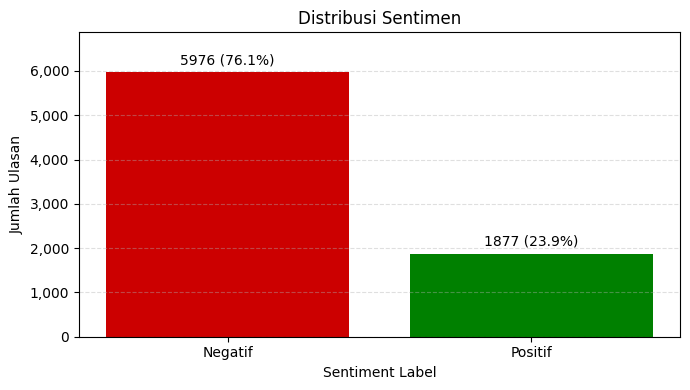

In [28]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Hitung distribusi label
dist = df_comment['sentiment_label'].value_counts().reset_index()
dist.columns = ['sentiment_label', 'jumlah']

# Hitung persentase
dist['persentase'] = (dist['jumlah'] / dist['jumlah'].sum() * 100).round(2)

# Urutkan label
dist = dist.sort_values('sentiment_label')

# Warna khusus:
colors = dist['sentiment_label'].map({
    'Positif': '#008000',   # hijau gelap
    'Negatif': '#cc0000'    # merah gelap
}).tolist()

# Plot
plt.figure(figsize=(7, 4))
plt.bar(dist['sentiment_label'], dist['jumlah'], color=colors)

# Format angka ribuan
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Grid halus
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Tambah ruang di atas bar
plt.ylim(0, dist['jumlah'].max() * 1.15)

# Label dan judul
plt.xlabel('Sentiment Label')
plt.ylabel('Jumlah Ulasan')
plt.title('Distribusi Sentimen')

# Tampilkan angka + persentase
for index, row in dist.iterrows():
    plt.text(
        index,
        row['jumlah'] + dist['jumlah'].max() * 0.03,
        f"{row['jumlah']} ({row['persentase']}%)",
        ha='center'
    )

plt.tight_layout()
plt.show()

### Konversi Label Teks ke Label Numerik

Bagian kode ini digunakan untuk mengubah label sentimen yang semula berbentuk teks ("Positif" dan "Negatif") menjadi angka (1 dan 0). Model NLP seperti IndoBERT hanya dapat memproses label dalam bentuk numerik, sehingga proses mapping ini wajib dilakukan sebelum training.

In [29]:
label_mapping = {
    "Positif": 1,
    "Negatif": 0
}

df_comment['sentiment_encoded'] = df_comment['sentiment_label'].map(label_mapping)

# Cek hasil 10 data pertama
df_comment.head(10)

,comment,case_folding,cleaning,normalisasi,tokenisasi,stopword_removal,stemming,score,sentiment_label,sentiment_encoded
0,"gedung elit, jaringan sulit.","gedung elit, jaringan sulit.",gedung elit jaringan sulit,gedung elit jaringan sulit,"[gedung, elit, jaringan, sulit]","[gedung, elit, jaringan, sulit]","[gedung, elit, jaring, sulit]",1,Positif,1
1,mau ngeluh tapi cuman satu satunya bank syaria...,mau ngeluh tapi cuman satu satunya bank syaria...,mau ngeluh tapi cuman satu satunya bank syaria...,mau ngeluh tapi cuma satu satunya bank syariah...,"[mau, ngeluh, tapi, cuma, satu, satunya, bank,...","[ngeluh, satunya, syariah, bumn]","[ngeluh, satu, syariah, bumn]",-1,Negatif,0
2,tim yg masih punya apk BSI lama😂😂😂😂,tim yg masih punya apk bsi lama😂😂😂😂,tim yg masih punya apk bsi lama,tim yang masih punya aplikasi bsi lama,"[tim, yang, masih, punya, aplikasi, bsi, lama]","[tim, aplikasi]","[tim, aplikasi]",-2,Negatif,0
3,"gw punya uang 2M lebih,ga percaya bank manapun...","gw punya uang 2m lebih,ga percaya bank manapun...",gw punya uang m lebihga percaya bank manapunma...,gue punya uang sama lebihga percaya bank manap...,"[gue, punya, uang, sama, lebihga, percaya, ban...","[gue, uang, lebihga, percaya, manapunmakanya, ...","[gue, uang, lebihga, percaya, manapunmakanya, ...",-1,Negatif,0
4,semoga bank konfensional kembali membuka caban...,semoga bank konfensional kembali membuka caban...,semoga bank konfensional kembali membuka caban...,semoga bank konfensional kembali membuka caban...,"[semoga, bank, konfensional, kembali, membuka,...","[semoga, konfensional, membuka, cabangnya, ace...","[moga, konfensional, buka, cabang, aceh, kasih...",1,Positif,1
5,Gara gara kau BSI gagal beli oleh2.. kena beba...,gara gara kau bsi gagal beli oleh2.. kena beba...,gara gara kau bsi gagal beli oleh kena beban m...,gara gara kau bsi gagal beli oleh kena beban m...,"[gara, gara, kau, bsi, gagal, beli, oleh, kena...","[gara, gara, kau, gagal, beli, kena, beban, mo...","[gara, gara, kau, gagal, beli, kena, beban, mo...",-5,Negatif,0
6,sejak pakek bsi ni ketar ketir tb2 gak bisa na...,sejak pakek bsi ni ketar ketir tb2 gak bisa na...,sejak pakek bsi ni ketar ketir tb gak bisa nar...,sejak pakai bsi nih ketar ketir tb tidak bisa ...,"[sejak, pakai, bsi, nih, ketar, ketir, tb, tid...","[pakai, nih, ketar, ketir, tidak, tarik, tidak...","[pakai, nih, ketar, tir, tidak, tarik, tidak, ...",-2,Negatif,0
7,untung masi punya apk bsi yg lama jadi aman😅,untung masi punya apk bsi yg lama jadi aman😅,untung masi punya apk bsi yg lama jadi aman,untung masih punya aplikasi bsi yang lama jadi...,"[untung, masih, punya, aplikasi, bsi, yang, la...","[untung, aplikasi, aman]","[untung, aplikasi, aman]",-1,Negatif,0
8,gilaa parahhhh buruk bgt jd susah mau ngapain²...,gilaa parahhhh buruk bgt jd susah mau ngapain²...,gilaa parahhhh buruk bgt jd susah mau ngapain ...,gila parahhhh buruk banget jadi sulit mau meng...,"[gila, parahhhh, buruk, banget, jadi, sulit, m...","[gila, parahhhh, buruk, banget, sulit, mengapa...","[gila, parahhhh, buruk, banget, sulit, kapai, ...",-1,Negatif,0
9,Untung bukan tim bsi,untung bukan tim bsi,untung bukan tim bsi,untung bukan tim bsi,"[untung, bukan, tim, bsi]","[untung, bukan, tim]","[untung, bukan, tim]",-2,Negatif,0


### Contoh 5 Data Positif dan Negatif

In [30]:
# Contoh 5 Data Positif
contoh_positif = (
    df_comment[df_comment['sentiment_encoded'] == 1]
    .head(5)
)

print("=== Contoh Ulasan Positif ===")
display(contoh_positif[['normalisasi', 'sentiment_label', 'sentiment_encoded']])


# Contoh 5 Data Negatif
contoh_negatif = (
    df_comment[df_comment['sentiment_encoded'] == 0]
    .head(5)
)

print("=== Contoh Ulasan Negatif ===")
display(contoh_negatif[['normalisasi', 'sentiment_label', 'sentiment_encoded']])


=== Contoh Ulasan Positif ===


,normalisasi,sentiment_label,sentiment_encoded
0,gedung elit jaringan sulit,Positif,1
4,semoga bank konfensional kembali membuka caban...,Positif,1
11,langsung tidak ada karyawan bsi yang live kanb...,Positif,1
13,nabung di bsi sudah kali tersedot saldo dan su...,Positif,1
14,dari dulu bank aceh lebih aman dan terpercaya,Positif,1


=== Contoh Ulasan Negatif ===


,normalisasi,sentiment_label,sentiment_encoded
1,mau ngeluh tapi cuma satu satunya bank syariah...,Negatif,0
2,tim yang masih punya aplikasi bsi lama,Negatif,0
3,gue punya uang sama lebihga percaya bank manap...,Negatif,0
5,gara gara kau bsi gagal beli oleh kena beban m...,Negatif,0
6,sejak pakai bsi nih ketar ketir tb tidak bisa ...,Negatif,0


### Wordcloud Positif dan Negatif

#### Wordcloud Positif

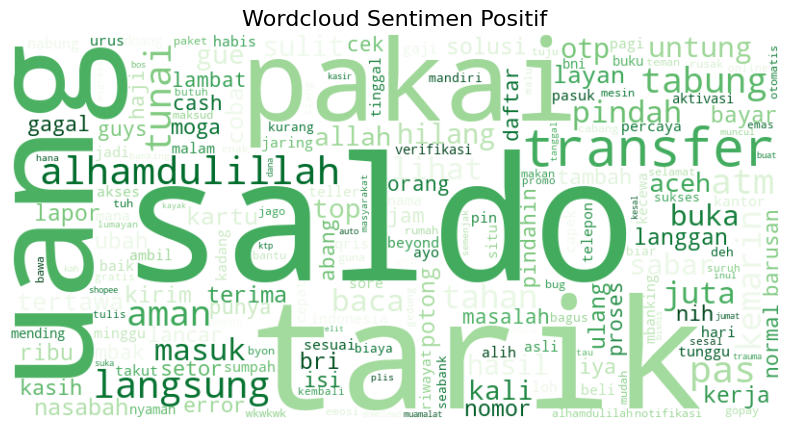

In [31]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Stopword tambahan khusus wordcloud
stopword_wc = {
    "bsi", "byond", "bank", "syariah",
    "aplikasi", "apk", 'byondbybsi',
    "nya", "juga", "udah", 'tidak',
    "gak", "ga", 'cont',
    "sih", "saja", "aja",
    "untuk", "banget",
    "mohon", "versi", "kakak",
    "pahamjadiberkah", "yuk", "update",
    "customer", "service", "cs",
    "fitur", "login", "akun", "email",
    "transaksi", "rekening", "mobile"
}

# Gabungkan dengan stopword bawaan wordcloud
wc_stopwords = STOPWORDS.union(stopword_wc)

# Ambil token dari data POSITIF (hasil stemming)
positive_tokens = df_comment[df_comment['sentiment_encoded'] == 1]['stemming']

# Gabungkan semua token menjadi satu string
text_pos = " ".join([" ".join(tokens) for tokens in positive_tokens])

# Buat wordcloud
wc_pos = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Greens",     # hijau lembut
    stopwords=wc_stopwords,
    max_words=200,
    max_font_size=180,
    collocations=False
).generate(text_pos)

# Tampilkan
plt.figure(figsize=(10, 5))
plt.imshow(wc_pos, interpolation="bilinear")
plt.title("Wordcloud Sentimen Positif", fontsize=16)
plt.axis("off")
plt.show()

#### Wordcloud Negatif

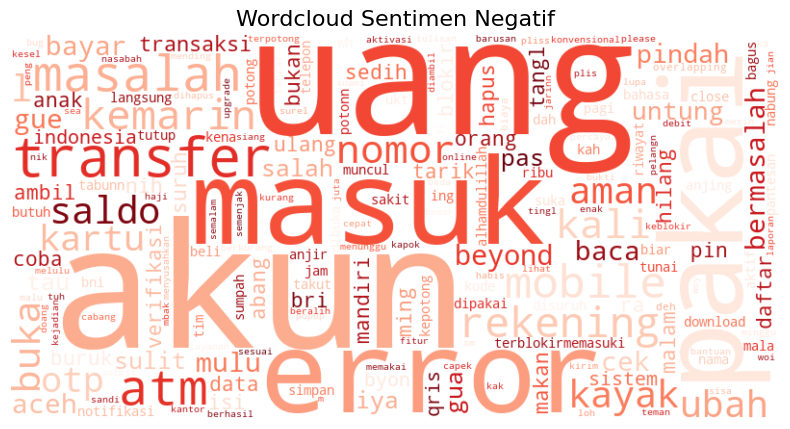

In [32]:
# Wordcloud Negatif
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Stopword tambahan khusus wordcloud (hindari kata tidak bermakna)
stopword_wc = {
    "bsi", "byond", "byond!", "bank", "syariah",
    "aplikasi", "apk", "tidak",
    "nya", "juga", "udah",
    "gak", "ga", "cont",
    "sih", "saja", "aja",
    "untuk", "banget",
    "mohon", "versi", "kakak",
    "pahamjadiberkah", "yuk", "update"
}

# Gabungkan token negatif menjadi satu teks panjang
text_neg = " ".join(
    [" ".join(tokens) for tokens in df_comment[df_comment['sentiment_encoded'] == 0]['stopword_removal']]
)

# Hapus kata tidak penting
for sw in stopword_wc:
    text_neg = text_neg.replace(sw, "")

# Generate WordCloud negatif
wc_neg = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="Reds",       # warna merah lembut → cocok untuk negatif
    max_words=200,
    max_font_size=180,
    collocations=False
).generate(text_neg)

# Tampilkan
plt.figure(figsize=(10, 5))
plt.imshow(wc_neg, interpolation="bilinear")
plt.title("Wordcloud Sentimen Negatif", fontsize=16)
plt.axis("off")
plt.show()

#### Simpan File Hasil Lexicon

In [33]:
# Export data yang sudah dimodify ke CSV
df_comment.to_csv("hasil_lexicon_tiktok.csv", index=False)

print("✅ File berhasil diekspor sebagai 'hasil_lexicon_tiktok.csv'")

✅ File berhasil diekspor sebagai 'hasil_lexicon_tiktok.csv'


## 4.2 Pembagian Dataset (*Train & Test Data Splitting*)

Tahap ini membagi dataset hasil preprocessing menjadi tiga subset, yaitu training set (80%), validation set (10%), dan test set (10%). Proses pembagian dilakukan melalui dua kali stratified sampling untuk menjaga agar proporsi label sentimen tetap seimbang pada setiap subset.

Dengan cara ini, model IndoBERT memperoleh data latih yang representatif, sementara evaluasi akhir pada validation dan test set tetap objektif dan tidak bias terhadap distribusi kelas tertentu.

### Membaca Dataset Hasil Lexicon

In [1]:
import pandas as pd

df_comment = pd.read_csv('hasil_lexicon_tiktok.csv')
display(df_comment[['normalisasi', 'sentiment_label', 'sentiment_encoded']].head())

,normalisasi,sentiment_label,sentiment_encoded
0,gedung elit jaringan sulit,Positif,1
1,mau ngeluh tapi cuma satu satunya bank syariah...,Negatif,0
2,tim yang masih punya aplikasi bsi lama,Negatif,0
3,gue punya uang sama lebihga percaya bank manap...,Negatif,0
4,semoga bank konfensional kembali membuka caban...,Positif,1


### First Split — Train (80%) & Temp (20%)

Kode ini membagi dataset menjadi tiga bagian: data pelatihan 80%, data validasi 10%, dan data pengujian 10%. Pembagian dilakukan dengan metode stratified sampling agar proporsi label positif dan negatif tetap seimbang pada setiap subset. Distribusi label kemudian dicek kembali untuk memastikan pembagian berjalan benar sebelum masuk ke tahap tokenisasi dan pemodelan

In [2]:
df_filtered = df_comment.copy()  # hindari view warning
df_filtered = df_filtered.dropna(subset=['sentiment_encoded'])

In [3]:
df_filtered['sentiment_encoded'].isna().sum()

np.int64(0)

In [4]:
from sklearn.model_selection import train_test_split


# 1. Split pertama: Train (80%) dan Temp (20%)
df_train, df_temp = train_test_split(
    df_comment,
    test_size=0.2,
    random_state=42,
    stratify=df_comment['sentiment_encoded']   # stratify pakai angka, bukan teks
)

# 2. Split kedua: Temp menjadi Validation (10%) dan Test (10%)
df_val, df_test = train_test_split(
    df_temp,
    test_size=0.5,   # setengah dari 20% = 10%
    random_state=42,
    stratify=df_temp['sentiment_encoded']       # stratify tetap pakai angka
)

# Verify Dataset Shapes
# Bagian ini mengecek ukuran masing-masing subset untuk memastikan pembagian telah sesuai rasio 80–10–10.
# Print shapes
print("Shape df_train:", df_train.shape)
print("Shape df_val:", df_val.shape)
print("Shape df_test:", df_test.shape)

# Cek distribusi label
print("\nDistribusi label TRAIN:")
print(df_train['sentiment_encoded'].value_counts(normalize=True))

print("\nDistribusi label VAL:")
print(df_val['sentiment_encoded'].value_counts(normalize=True))

print("\nDistribusi label TEST:")
print(df_test['sentiment_encoded'].value_counts(normalize=True))

Shape df_train: (6282, 10)
Shape df_val: (785, 10)
Shape df_test: (786, 10)

Distribusi label TRAIN:
sentiment_encoded
0    0.760904
1    0.239096
Name: proportion, dtype: float64

Distribusi label VAL:
sentiment_encoded
0    0.761783
1    0.238217
Name: proportion, dtype: float64

Distribusi label TEST:
sentiment_encoded
0    0.760814
1    0.239186
Name: proportion, dtype: float64


### Second Split — Validation (10%) & Test (10%)

Sub-subset temp (20%) dipecah lagi menjadi validation dan test dengan rasio 50:50, menghasilkan masing-masing 10% dari total dataset.

In [5]:
from sklearn.model_selection import train_test_split

# 1. Split Train (80%) dan Temp (20%)
df_train, df_temp = train_test_split(
    df_comment,
    test_size=0.2,
    random_state=42,
    stratify=df_comment['sentiment_label']
)

# 2. Split Temp menjadi Validation (10%) dan Test (10%)
df_val, df_test = train_test_split(
    df_temp,
    test_size=0.5,  # setengah dari 20% = 10%
    random_state=42,
    stratify=df_temp['sentiment_label']
)

df_train.shape, df_test.shape, df_val.shape

# Check Label Distribution
# Bagian ini menampilkan persentase label pada train, validation, dan test untuk memastikan stratify berjalan dengan baik dan distribusi tetap seimbang.
df_train['sentiment_label'].value_counts(normalize=True)
df_val['sentiment_label'].value_counts(normalize=True)
df_test['sentiment_label'].value_counts(normalize=True)

sentiment_label
Negatif    0.760814
Positif    0.239186
Name: proportion, dtype: float64

In [6]:
train_texts = set(df_train['comment'])
test_texts = set(df_test['comment'])

overlap = train_texts.intersection(test_texts)

print("Jumlah data yang sama di train & test:", len(overlap))

Jumlah data yang sama di train & test: 0


## 4.3 Inisialisasi Model & Pengaturan Tokenizer

Tahap ini bertujuan menyiapkan pre-trained model IndoBERT yang akan digunakan untuk proses fine-tuning. Proses dimulai dengan menentukan model dasar (IndoBERT-base-p2), memuat tokenizer-nya, serta melakukan analisis awal seperti distribusi token length untuk menentukan nilai max_length yang aman sebelum masuk ke tahap tokenisasi dan pembuatan dataset HuggingFace.

#### Pemilihan Pre-trained Model IndoBERT

Bagian ini memilih model dasar yang akan digunakan untuk fine-tuning. Kamu menggunakan IndoBERT-base-p2, model umum untuk tugas klasifikasi teks Bahasa Indonesia.

In [7]:
# Tentukan pre-trained model yang akan digunakan untuk fine-tuning
# Daftar model dapat ditemukan pada https://huggingface.co
# Tentukan pre-trained model (SETELAH split dataset)

PRE_TRAINED_MODEL = 'indobenchmark/indobert-base-p2'  # https://huggingface.co/indobenchmark/indobert-base-p2

#### Inisialisasi Tokenizer & Model Classification

Tokenizer bertugas mengubah teks menjadi token sesuai format IndoBERT.
Model diinisialisasi dengan jumlah label = 2 (positif & negatif).

In [13]:
import sys
!{sys.executable} -m pip install transformers==4.39.3

   ---------------------------------------- 0.0/8.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.8 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.8 MB 1.9 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/8.8 MB 1.9 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/8.8 MB 1.9 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/8.8 MB 1.9 MB/s eta 0:00:05
   ---- ----------------------------------- 1.0/8.8 MB 811.6 kB/s eta 0:00:10
   ---- ----------------------------------- 1.0/8.8 MB 811.6 kB/s eta 0:00:10
   ---- ----------------------------------- 1.0/8.8 MB 811.6 kB/s eta 0:00:10
   ---- ----------------------------------- 1.0/8.8 MB 811.6 kB/s eta 0:00:10
   ---- ----------------------------------- 1.0/8.8 MB 811.6 kB/s eta 0:00:10
   ---- ----------------------------------- 1.0/8.8 MB 811.6 kB/s eta 0:00:10
   ----- ---------------------------------- 1.3/8.8 MB 466.0 kB/s eta 0:00:17
   ----- ---

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 5.1.2 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.39.3 which is incompatible.


In [14]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained(PRE_TRAINED_MODEL)

model = AutoModelForSequenceClassification.from_pretrained(
    PRE_TRAINED_MODEL,
    num_labels=2  # karena hanya positif & negatif
)

ImportError: cannot import name 'is_quanto_available' from 'transformers.utils' (c:\Users\bayuw\.conda\envs\sentimen\lib\site-packages\transformers\utils\__init__.py)

#### Analisis Token Length (Menentukan max_length)

Bagian ini menghitung panjang token setiap kalimat untuk memastikan nilai max_length tidak terlalu kecil atau berlebihan.
1. Kalau max < 128 → 128 aman.
2. Kalau max 150 → kamu bisa naikan ke 160 atau 192.
3. Tapi 128 tetap recommended.

In [10]:
lengths = df_comment['normalisasi'].fillna('').apply(lambda x: len(tokenizer.tokenize(x)))
lengths.describe()

count    7853.000000
mean       13.956450
std        10.733486
min         1.000000
25%         7.000000
50%        11.000000
75%        18.000000
max       218.000000
Name: normalisasi, dtype: float64

### Pembuatan Fungsi Tokenisasi (tokenize())

Tahap ini mendefinisikan fungsi tokenisasi yang akan digunakan oleh HuggingFace Dataset untuk mengubah setiap teks pada kolom normalisasi menjadi format numerik yang dapat diproses oleh model IndoBERT. Proses ini menghasilkan dua komponen penting:
1.   input_ids: representasi numerik dari token hasil pemetaan tokenizer.
2.   attention_mask: penanda token mana yang perlu diperhatikan model (1) dan mana yang hanya padding (0).

Fungsi ini menerapkan padding dan truncation secara konsisten memakai max_length=160, sehingga seluruh input memiliki panjang seragam tanpa kehilangan informasi signifikan. Tahap tokenisasi ini wajib sebelum dataset diubah menjadi tensor untuk proses training IndoBERT.

In [11]:
def tokenize(batch):
    return tokenizer(
        batch["normalisasi"],
        padding="max_length",
        truncation=True,
        max_length=256
    )

### Konversi DataFrame ke HuggingFace Dataset & Encoding Label

Deskripsi Singkat (untuk 1 kolom Colab)

Tahap ini mengubah dataset yang sebelumnya masih dalam bentuk pandas DataFrame menjadi format HuggingFace Dataset, yang lebih efisien untuk proses tokenisasi, batching, dan training dengan Trainer API. Setelah itu dilakukan pemetaan label sentimen dari bentuk string ("Positif"/"Negatif") menjadi format numerik (1/0) agar dapat diproses oleh model IndoBERT selama training.

Langkah inti pada tahap ini meliputi:
1. Konversi DataFrame → Dataset (Dataset.from_pandas)
2. Pemetaan label string menjadi angka menggunakan fungsi encode_label
3. Persiapan dataset agar kompatibel dengan Trainer sebelum masuk tahap tokenisasi

In [17]:
import sys
!{sys.executable} -m pip install --upgrade transformers torch accelerate

  Using cached torch-2.9.1-cp310-cp310-win_amd64.whl.metadata (30 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
Using cached torch-2.9.1-cp310-cp310-win_amd64.whl (111.0 MB)
Using cached sympy-1.14.0-py3-none-any.whl (6.3 MB)

  Attempting uninstall: sympy

    Found existing installation: sympy 1.13.1

   ---------------------------------------- 0/3 [sympy]
   ---------------------------------------- 0/3 [sympy]
   ---------------------------------------- 0/3 [sympy]
   ---------------------------------------- 0/3 [sympy]
   ---------------------------------------- 0/3 [sympy]
   ---------------------------------------- 0/3 [sympy]
   ---------------------------------------- 0/3 [sympy]
   ---------------------------------------- 0/3 [sympy]
   ---------------------------------------- 0/3 [sympy]
   ---------------------------------------- 0/3 [sympy]
    Uninstalling sympy-1.13.1:
   ---------------------------------------- 0/3 [sympy]
   -------------------------

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.6.0+cu124 requires torch==2.6.0+cu124, but you have torch 2.9.1 which is incompatible.
torchvision 0.21.0+cu124 requires torch==2.6.0+cu124, but you have torch 2.9.1 which is incompatible.


In [22]:
# Convert pandas → HuggingFace Dataset
from datasets import Dataset

train_dataset = Dataset.from_pandas(df_train)
val_dataset   = Dataset.from_pandas(df_val)
test_dataset  = Dataset.from_pandas(df_test)

# Mapping label ke angka
label2id = {"Positif": 1, "Negatif": 0}
id2label = {1: "Positif", 0: "Negatif"}

def encode_label(example):
    example["label"] = label2id[example["sentiment_label"]]
    return example

# Terapkan mapping ke semua subset
train_dataset = train_dataset.map(encode_label)
val_dataset   = val_dataset.map(encode_label)
test_dataset  = test_dataset.map(encode_label)

Map:   0%|          | 0/6282 [00:00<?, ? examples/s]

Map:   0%|          | 0/785 [00:00<?, ? examples/s]

Map:   0%|          | 0/786 [00:00<?, ? examples/s]

###Tokenisasi dataset

1. Proses Tokenisasi Teks → Token BERT
Tahap ini menjalankan fungsi tokenize() untuk mengubah setiap kalimat menjadi dua komponen penting, yaitu input_ids dan attention_mask. Prosesnya dilakukan secara batched agar lebih efisien untuk pemrosesan jumlah data besar.

2. Penghapusan Kolom Teks Asli & Label String
Setelah tokenisasi selesai, kolom teks mentah (normalisasi) dan label berbentuk teks (sentiment_label) dihapus. Dataset hanya menyisakan komponen tensor yang dibutuhkan pada proses fine-tuning IndoBERT.

3. Penyesuaian Kolom Label Numerik
Kolom label hasil encoding (sentiment_encoded) diganti namanya menjadi labels agar sesuai dengan standar input Trainer API pada library Transformers.

In [23]:
# Tokenisasi dataset
train_dataset = train_dataset.map(tokenize, batched=True)
val_dataset   = val_dataset.map(tokenize, batched=True)
test_dataset  = test_dataset.map(tokenize, batched=True)

# Remove kolom text & label string
train_dataset = train_dataset.remove_columns(["normalisasi", "sentiment_label"])
val_dataset   = val_dataset.remove_columns(["normalisasi", "sentiment_label"])
test_dataset  = test_dataset.remove_columns(["normalisasi", "sentiment_label"])

# Rename kolom label numerik ke 'labels'
train_dataset = train_dataset.rename_column("sentiment_encoded", "labels")
val_dataset   = val_dataset.rename_column("sentiment_encoded", "labels")
test_dataset  = test_dataset.rename_column("sentiment_encoded", "labels")

Map:   0%|          | 0/6282 [00:00<?, ? examples/s]

Map:   0%|          | 0/785 [00:00<?, ? examples/s]

Map:   0%|          | 0/786 [00:00<?, ? examples/s]

### Training Arguments Setup

Bagian ini mengatur seluruh parameter proses fine-tuning, seperti learning rate, batch size, jumlah epoch, strategi evaluasi dan penyimpanan model, serta metrik utama yang digunakan untuk memilih model terbaik. Semua pengaturan ini mempengaruhi performa dan stabilitas proses training IndoBERT.

In [25]:
import accelerate, sys, torch
print("Accelerate version :", accelerate.__version__)
print("Python executable :", sys.executable)
print("Torch version :", torch.__version__)

Accelerate version : 1.12.0
Python executable : c:\Users\bayuw\.conda\envs\sentimen\python.exe
Torch version : 2.6.0+cu124


In [26]:
from accelerate import Accelerator
print("Accelerate OK")

Accelerate OK


In [27]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./indobert-sentiment",
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=4,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True
)

ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.26.0`: Please run `pip install transformers[torch]` or `pip install 'accelerate>=0.26.0'`

### Definisikan Fungsi Compute Metrics

Bagian ini mendefinisikan fungsi evaluasi yang digunakan selama proses training dan validation. Fungsi ini menghitung metrik utama seperti accuracy, precision, recall, dan F1-score dengan pendekatan weighted, sehingga tetap adil meskipun distribusi label tidak seimbang. Nilai-nilai ini membantu mengukur kualitas prediksi model IndoBERT secara komprehensif.

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, preds, average='weighted'
    )
    acc = accuracy_score(labels, preds)

    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

### Inisialisasi Trainer

Tahap ini menginisialisasi objek Trainer, yaitu modul dari HuggingFace yang menangani seluruh proses training, evaluasi, logging, dan model checkpointing. Pada bagian ini, model IndoBERT, dataset yang telah ditokenisasi, set parameter training, serta fungsi metrik digabungkan menjadi satu pipeline siap latih.

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,  # Model IndoBERT Anda yang sudah didefinisikan sebelumnya
    args=training_args,
    train_dataset=train_dataset,  # Dataset training yang sudah di-tokenize
    eval_dataset=val_dataset,  # Dataset validasi yang sudah di-tokenize
    compute_metrics=compute_metrics
)

## 4.5 *Fine-Tuning*

Bagian ini menjalankan proses fine-tuning pada model IndoBERT menggunakan dataset training dan mengevaluasi performanya pada validation set setiap epoch. Setelah training selesai, Trainer otomatis memuat model terbaik berdasarkan metrik F1-score.

In [ ]:
# Training model
trainer.train()

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: wicaksonobay (wicaksonobay-uin-jakarta) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.292800,0.171631,0.929936,0.930000,0.930068,0.929936
2,0.118100,0.203252,0.947771,0.947818,0.947870,0.947771
3,0.043400,0.258449,0.946497,0.946690,0.946947,0.946497
4,0.008200,0.269608,0.954140,0.954466,0.955048,0.954140


TrainOutput(global_step=1572, training_loss=0.11562408002581609, metrics={'train_runtime': 810.6331, 'train_samples_per_second': 30.998, 'train_steps_per_second': 1.939, 'total_flos': 2066079562214400.0, 'train_loss': 0.11562408002581609, 'epoch': 4.0})

### Simpan Model

Menyimpan model dan tokenizer yang sudah dilatih agar bisa digunakan kembali tanpa perlu melatih ulang.

In [ ]:
# Simpan model
trainer.save_model("./indobert-sentiment-tiktok")

# Atau simpan secara manual
model.save_pretrained("./indobert-sentiment-tiktok")
tokenizer.save_pretrained("./indobert-sentiment-tiktok")

('./indobert-sentiment-tiktok/tokenizer_config.json',
 './indobert-sentiment-tiktok/special_tokens_map.json',
 './indobert-sentiment-tiktok/vocab.txt',
 './indobert-sentiment-tiktok/added_tokens.json',
 './indobert-sentiment-tiktok/tokenizer.json')

### Mount Google Drive

Menghubungkan Google Colab dengan Google Drive agar file dapat disimpan atau diakses secara langsung.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Salin ke Drive

Menyalin folder model yang sudah disimpan ke Google Drive agar tersimpan permanen.

In [ ]:
!cp -r indobert-sentiment-tiktok /content/drive/MyDrive/

### Cek File di Drive

Menampilkan isi folder Google Drive untuk memastikan model sudah berhasil disalin.

In [ ]:
!ls /content/drive/MyDrive/

'Colab Notebooks'   indobert-sentiment-tiktok  'Zoom sanul sempro'


## 4.6 Implementasi Model Untuk Prediksi

#### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Load Model dan Tokenizer

Memuat model IndoBERT yang sudah dilatih beserta tokenizer-nya dari Google Drive untuk siap digunakan melakukan prediksi.

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_path = "/content/drive/MyDrive/indobert-sentiment-tiktok"

tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(50000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

#### Fungsi Prediksi Sentimen

Mendefinisikan fungsi predict yang menerima teks input, melakukan tokenization, inferensi model, menghitung probabilitas dengan softmax, dan mengembalikan label prediksi beserta tingkat keyakinannya.

In [ ]:
import torch

def predict(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=128, padding=True)
    inputs = {k: v.to(model.device) for k, v in inputs.items()}   # <- penting
    model.eval()
    with torch.no_grad():
        outputs = model(**inputs)
        probs = torch.softmax(outputs.logits, dim=1)
        label = torch.argmax(probs, dim=1).item()
        conf = probs[0][label].item()
    return label, conf

#### Contoh Prediksi

Menguji fungsi predict dengan satu contoh teks dan menampilkan hasil label dan tingkat keyakinannya.

In [ ]:
# kelas sentimennya 0 = Negatif, 1=Positif
# nilai confidence atau tingkat keyakinan model
predict("BYOND bagus banget aplikasinya cepat")

(1, 0.9918740391731262)

# 📊 5. Asess

## 5.1 Evaluasi Performa Model

Mengevaluasi performa model pada validation set dan test set untuk melihat akurasi, loss, dan metrik lainnya.

In [ ]:
import pandas as pd

# Evaluasi pada validation set
eval_results = trainer.evaluate()

# Evaluasi pada test set
test_results = trainer.evaluate(test_dataset)

# Menggabungkan hasil ke dalam satu tabel
df_results = pd.DataFrame([
    {"Set": "Validation", **eval_results},
    {"Set": "Test", **test_results}
])

# Menampilkan tabel
df_results

,Set,eval_loss,eval_accuracy,eval_f1,eval_precision,eval_recall,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch
0,Validation,0.269608,0.954140,0.954466,0.955048,0.954140,6.4891,120.973,7.705,4.0
1,Test,0.238156,0.956743,0.956663,0.956600,0.956743,6.3454,123.869,7.880,4.0


## 5.2 Confusion Matrix

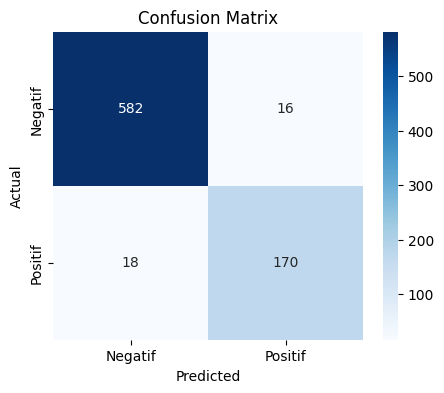

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dapatkan prediksi untuk test set
pred_test = trainer.predict(test_dataset)
y_true = pred_test.label_ids
y_pred = pred_test.predictions.argmax(-1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negatif', 'Positif'],
            yticklabels=['Negatif', 'Positif'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## 5.3 Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=['Negatif', 'Positif'], digits=4))

              precision    recall  f1-score   support

     Negatif     0.9700    0.9732    0.9716       598
     Positif     0.9140    0.9043    0.9091       188

    accuracy                         0.9567       786
   macro avg     0.9420    0.9387    0.9404       786
weighted avg     0.9566    0.9567    0.9567       786



## 5.4 ROC Curve & AUC


AUC Score (softmax): 0.9907


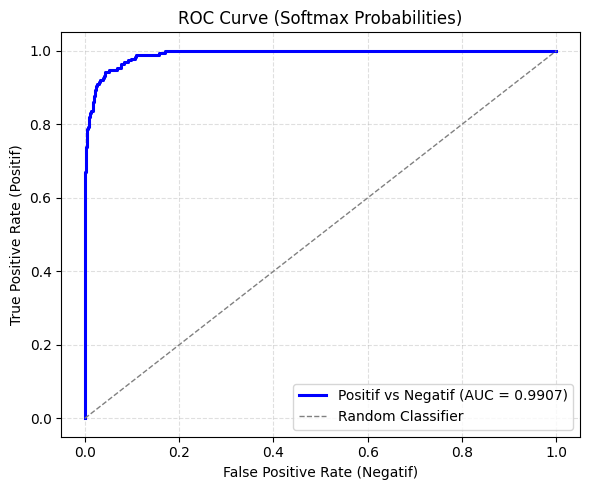

In [ ]:
from sklearn.metrics import roc_curve, auc
from scipy.special import softmax
import matplotlib.pyplot as plt
import numpy as np

# Convert logits → probabilitas dengan softmax
logits = pred_test.predictions
probs = softmax(logits, axis=1)
probs_positive = probs[:, 1]  # Probabilitas kelas Positif

# Hitung ROC
fpr, tpr, _ = roc_curve(y_true, probs_positive)
roc_auc = auc(fpr, tpr)

# Tampilkan nilai AUC di output
print(f"AUC Score (softmax): {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(
    fpr, tpr,
    color='blue',
    linewidth=2.2,
    markersize=4,
    label=f"Positif vs Negatif (AUC = {roc_auc:.4f})"
)

# Garis diagonal pembanding
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1, label="Random Classifier")

plt.xlabel("False Positive Rate (Negatif)")
plt.ylabel("True Positive Rate (Positif)")
plt.title("ROC Curve (Softmax Probabilities)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [ ]:
train_texts = set(df_train['comment'])
test_texts = set(df_test['comment'])

overlap = train_texts.intersection(test_texts)

print("Jumlah data yang sama di train & test:", len(overlap))

Jumlah data yang sama di train & test: 0


In [ ]:
import numpy as np

print(pred_test.predictions[:5])  # lihat bentuknya

[[ 4.8728647 -4.8325605]
 [ 4.407497  -4.2045608]
 [-4.9612374  4.51495  ]
 [ 4.9541783 -4.859107 ]
 [ 4.9441943 -4.8078704]]


In [ ]:
print(len(y_true), len(pred_test.predictions))

786 786


In [ ]:
df_comment.duplicated().sum()

np.int64(0)

## 5.5 Distribusi Hasil Sentimen

Notebook ini digunakan untuk melakukan **klasifikasi sentimen** menggunakan model **IndoBERT yang telah di-fine-tune**. Analisis ini bertujuan untuk mengetahui **proporsi hasil prediksi** pada tiga kelas sentimen: *Negative, Neutral,* dan *Positive*, serta memvisualisasikannya dalam bentuk diagram batang.

Tujuan utama dari notebook ini adalah untuk:
- Mengevaluasi distribusi sentimen setelah proses **fine-tuning**.
- Menampilkan hasil dalam bentuk **persentase dan grafik batang**.
- Mengekspor **data pelatihan (fine-tuning)** ke file CSV untuk dokumentasi dan analisis lanjutan.


In [ ]:
# ============================================================
# 1. LOAD DATASET
# ============================================================
import pandas as pd

# File CSV kamu
file_path = "hasil_lexicon_tiktok.csv"   # pastikan nama file sesuai
df = pd.read_csv(file_path)

# Cek kolom normalisasi
df['normalisasi'].head()

,normalisasi
0,gedung elit jaringan sulit
1,mau ngeluh tapi cuma satu satunya bank syariah...
2,tim yang masih punya aplikasi bsi lama
3,gue punya uang sama lebihga percaya bank manap...
4,semoga bank konfensional kembali membuka caban...


Load Model IndoBERT

In [ ]:
# ============================================================
# 2. LOAD MODEL INDOBERT (2 KELAS)
# ============================================================
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

model_path = "/content/drive/MyDrive/indobert-sentiment-tiktok"  # model kamu

tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(50000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
# ============================================================
# 3. FUNGSI PREDIKSI INDOBERT
# ============================================================
def predict_sentiment(text):
    # Tokenisasi
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=256)

    # Forward pass
    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits
    pred = torch.argmax(logits, dim=1).item()  # 0 = negatif, 1 = positif
    return pred

In [ ]:
# ============================================================
# 4. GENERATE LABEL BARU (bert_label & bert_encoded)
# ============================================================

# Prediksi tiap baris berdasarkan kolom normalisasi
df["bert_encoded"] = df["normalisasi"].fillna("").apply(predict_sentiment)

# Mapping angka → teks
mapping = {0: "negatif", 1: "positif"}
df["bert_label"] = df["bert_encoded"].map(mapping)

df[["normalisasi", "bert_encoded", "bert_label"]].head()

,normalisasi,bert_encoded,bert_label
0,gedung elit jaringan sulit,1,positif
1,mau ngeluh tapi cuma satu satunya bank syariah...,0,negatif
2,tim yang masih punya aplikasi bsi lama,0,negatif
3,gue punya uang sama lebihga percaya bank manap...,0,negatif
4,semoga bank konfensional kembali membuka caban...,1,positif


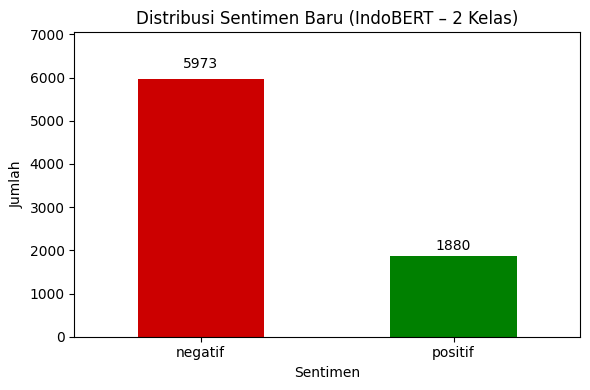

In [ ]:
# ============================================================
# 6. PLOT DISTRIBUSI SENTIMEN (MATPLOTLIB) — FIXED KeyError
# ============================================================
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

counts = df["bert_label"].value_counts()

# Mapping warna aman untuk semua format huruf
color_map = {
    "positif": "#008000",
    "negatif": "#cc0000",
}

# Siapkan warna tanpa error
bar_colors = [color_map.get(label, "#808080") for label in counts.index]

ax = counts.plot(kind="bar", color=bar_colors)

# Tambahkan angka di atas batang
for i, value in enumerate(counts):
    ax.text(i, value + (value * 0.03), str(value),
            ha='center', va='bottom', fontsize=10)

# Perbesar sumbu Y agar label tidak bertabrakan
max_val = counts.max()
plt.ylim(0, max_val * 1.18)

plt.title("Distribusi Sentimen Baru (IndoBERT – 2 Kelas)")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
# ============================================================
# 5. SIMPAN DATA HASIL (OPSIONAL)
# ============================================================
df.to_csv("label_indobert_tiktok.csv", index=False)

# 🧩 6. Analisis Lanjutan Menggunakan BERTopic (Tiktok)

## Instalasi Library

In [ ]:
!pip install bertopic[all] umap-learn hdbscan Sastrawi
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 17.5 MB/s eta 0:00:00


## Import Library & Inisialisasi

In [ ]:
from bertopic import BERTopic
import pandas as pd
import matplotlib.pyplot as plt
import re

/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


### Memanggil Dataset Tiktok

In [ ]:
# Load CSV lokal
file_path = "/content/label_indobert_tiktok.csv"  # pastikan path sesuai lokasi file
df = pd.read_csv(file_path)
df.head()

,comment,case_folding,cleaning,normalisasi,tokenisasi,stopword_removal,stemming,score,sentiment_label,sentiment_encoded,bert_encoded,bert_label
0,"gedung elit, jaringan sulit.","gedung elit, jaringan sulit.",gedung elit jaringan sulit,gedung elit jaringan sulit,"['gedung', 'elit', 'jaringan', 'sulit']","['gedung', 'elit', 'jaringan', 'sulit']","['gedung', 'elit', 'jaring', 'sulit']",1,Positif,1,1,positif
1,mau ngeluh tapi cuman satu satunya bank syaria...,mau ngeluh tapi cuman satu satunya bank syaria...,mau ngeluh tapi cuman satu satunya bank syaria...,mau ngeluh tapi cuma satu satunya bank syariah...,"['mau', 'ngeluh', 'tapi', 'cuma', 'satu', 'sat...","['ngeluh', 'satunya', 'syariah', 'bumn']","['ngeluh', 'satu', 'syariah', 'bumn']",-1,Negatif,0,0,negatif
2,tim yg masih punya apk BSI lama😂😂😂😂,tim yg masih punya apk bsi lama😂😂😂😂,tim yg masih punya apk bsi lama,tim yang masih punya aplikasi bsi lama,"['tim', 'yang', 'masih', 'punya', 'aplikasi', ...","['tim', 'aplikasi']","['tim', 'aplikasi']",-2,Negatif,0,0,negatif
3,"gw punya uang 2M lebih,ga percaya bank manapun...","gw punya uang 2m lebih,ga percaya bank manapun...",gw punya uang m lebihga percaya bank manapunma...,gue punya uang sama lebihga percaya bank manap...,"['gue', 'punya', 'uang', 'sama', 'lebihga', 'p...","['gue', 'uang', 'lebihga', 'percaya', 'manapun...","['gue', 'uang', 'lebihga', 'percaya', 'manapun...",-1,Negatif,0,0,negatif
4,semoga bank konfensional kembali membuka caban...,semoga bank konfensional kembali membuka caban...,semoga bank konfensional kembali membuka caban...,semoga bank konfensional kembali membuka caban...,"['semoga', 'bank', 'konfensional', 'kembali', ...","['semoga', 'konfensional', 'membuka', 'cabangn...","['moga', 'konfensional', 'buka', 'cabang', 'ac...",1,Positif,1,1,positif


In [ ]:
df_positif = df[df["bert_label"] == "positif"].copy()
print("Jumlah Ulasan Positif:", len(df_positif))

Jumlah Ulasan Positif: 1880


In [ ]:
df_negatif = df[df["bert_label"] == "negatif"].copy()
print("Jumlah Ulasan Negatif:", len(df_negatif))

Jumlah Ulasan Negatif: 5973


## Positif

In [ ]:
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# --- stopword dasar dari Sastrawi ---
factory = StopWordRemoverFactory()
base_stopwords = set(factory.get_stop_words())

# --- stopword tambahan untuk data TikTok (super lengkap) ---
extra_stopwords = {
    # kata panggilan
    "kak", "kakak", "bang", "bro", "sis", "bos", "min", "admin",

    # nama aplikasi & banking
    "bsi", "byond", "beyond", "wondr", "bni", "mbanking", "mobile", "bank", "byondbybsi", "beyondbsii",

    # kata bantu umum yang tidak bermakna topik
    "bisa", "tidak", "ga", "gak", "gk", "nggak", "ngga", "enggak",
    "iya", "kayak", "gua", "gue", "aku", "kamu", "anda", "mereka",
    "saya", "mau", "udah", "lagi", "yang", "dengan", "agar", "jadi",

    # kata noise umum TikTok
    "anjir", "anjay", "banget", "parah", "loh", "lah", "kok", "sih", "tertahan", "allah",
    "wkwk", "wkwkwk", "hehe", "haha", "hmm", "tertawa", "bagaimana", "kalau", "sabar", "baca",

    # corporate / lokasi bias
    "tbk", "pt", "aceh", "indonesia",

    # Tambahan kata umum lainnya
    "lama",

}

# gabungkan semua stopword
all_stopwords = base_stopwords.union(extra_stopwords)

# --- CLEANING SUPER KOMPREHENSIF UNTUK BERTopic ---
def clean_bertopic_pos(text):
    text = str(text).lower()

    # hapus URL, @mention, hashtag
    text = re.sub(r"http\S+|www\S+|@\w+|#\w+", " ", text)

    # hapus karakter selain huruf/angka/spasi
    text = re.sub(r"[^a-zA-Z0-9\s]", " ", text)

    # hapus kata 1–3 huruf (mengurangi bias X)
    text = re.sub(r"\b\w{1,3}\b", " ", text)

    # stopword filter
    tokens = [w for w in text.split() if w not in all_stopwords]

    return " ".join(tokens).strip()

In [ ]:
df_positif["clean_text"] = df_positif["normalisasi"].apply(clean_bertopic_pos)
df_positif[["normalisasi", "clean_text"]].head()

,normalisasi,clean_text
0,gedung elit jaringan sulit,gedung elit jaringan sulit
4,semoga bank konfensional kembali membuka caban...,semoga konfensional membuka cabangnya kasihan ...
11,langsung tidak ada karyawan bsi yang live kanb...,langsung karyawan live kanbiasanya sore banyak...
12,kan tampil beda dari daerah lain,tampil beda daerah
13,nabung di bsi sudah kali tersedot saldo dan su...,nabung kali tersedot saldo kapok sekarang nabu...


In [ ]:
# 5. EMBEDDING MODEL TERBAIK
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer("paraphrase-multilingual-mpnet-base-v2")

In [ ]:
# 6. BERTopic MODEL

topic_model = BERTopic(
    embedding_model=embedding_model,
    language="indonesian",
    min_topic_size=40,     # cluster minimal agar topik stabil
    nr_topics="4"       # otomatis menentukan jumlah topik
)

topics, probs = topic_model.fit_transform(df_positif["clean_text"])

df_positif["topic"] = topics

In [ ]:
# 7. TOPIC INFO

topic_info = topic_model.get_topic_info()
topic_info

,Topic,Count,Name,Representation,Representative_Docs
0,-1,45,-1_elit_gedung_jaringan_sulit,"[elit, gedung, jaringan, sulit, ubur, syulitt,...","[gedung elit jaringan sulit, gedung elit jarin..."
1,0,1755,0_akun_saldo_tarik_uang,"[akun, saldo, tarik, uang, pakai, transaksi, t...","[akun tarik tunai, kemarin akun tarik tunai, a..."
2,1,80,1_syariah_haji_tabungan_pakai,"[syariah, haji, tabungan, pakai, islam, uang, ...","[tabungan haji akun pakai tabungan, tabungan h..."


In [ ]:
# 8. PRINT KEYWORDS PER TOPIK

print("=== Keywords for All Topics ===")
for topic_id in topic_info["Topic"]:
    if topic_id == -1:   # skip outlier jika mau
        continue
    print(f"\nTOPIC {topic_id}")
    print(topic_model.get_topic(topic_id))

=== Keywords for All Topics ===

TOPIC 0
[('akun', np.float64(0.08388195355138116)), ('saldo', np.float64(0.07042236819799026)), ('tarik', np.float64(0.062366098238990995)), ('uang', np.float64(0.05697835241494019)), ('pakai', np.float64(0.0530836963189857)), ('transaksi', np.float64(0.04892234400419452)), ('transfer', np.float64(0.04379798621649151)), ('alhamdulillah', np.float64(0.04238063706134219)), ('langsung', np.float64(0.04145322569661205)), ('tunai', np.float64(0.040460956135413936))]

TOPIC 1
[('syariah', np.float64(0.2823428239635002)), ('haji', np.float64(0.19100999193804116)), ('tabungan', np.float64(0.140782209069045)), ('pakai', np.float64(0.06364711773932061)), ('islam', np.float64(0.0634837062170462)), ('uang', np.float64(0.052448840122670426)), ('nasabah', np.float64(0.04506947846818998)), ('muhammadiyah', np.float64(0.04499082927123629)), ('sama', np.float64(0.043871418268377774)), ('tarik', np.float64(0.041325901879103726))]


In [ ]:
# 1. Define custom topic names (khusus untuk data positif)
custom_labels = {
    0: "Pengalaman Transaksi & Kemudahan Akses Layanan",
    1: "Kepercayaan terhadap Prinsip Syariah & Produk Tabungan Haji"
}

# 2. Apply rename to topic model
topic_model.set_topic_labels(custom_labels)

# 3. Print renamed topics + keywords
print("\n=== TOPIK & KEYWORDS POSITIF SETELAH RENAME ===")
for topic_id, keywords in topic_model.get_topics().items():
    if topic_id == -1:
        continue
    print(f"\nTOPIC {topic_id} — {custom_labels[topic_id]}")
    print(keywords)

# 4. Mapping ke Aspek Penelitian
aspek_mapping = {
    0: "Aspek Positif 1: Efisiensi Transaksi & Kecepatan Layanan",
    1: "Aspek Positif 2: Kepatuhan Syariah & Kepercayaan Religius Nasabah"
}

print("\n=== ASPEK PER TOPIK POSITIF ===")
for topic_id, aspek in aspek_mapping.items():
    print(f"TOPIC {topic_id} → {aspek}")



=== TOPIK & KEYWORDS POSITIF SETELAH RENAME ===

TOPIC 0 — Pengalaman Transaksi & Kemudahan Akses Layanan
[('akun', np.float64(0.08388195355138116)), ('saldo', np.float64(0.07042236819799026)), ('tarik', np.float64(0.062366098238990995)), ('uang', np.float64(0.05697835241494019)), ('pakai', np.float64(0.0530836963189857)), ('transaksi', np.float64(0.04892234400419452)), ('transfer', np.float64(0.04379798621649151)), ('alhamdulillah', np.float64(0.04238063706134219)), ('langsung', np.float64(0.04145322569661205)), ('tunai', np.float64(0.040460956135413936))]

TOPIC 1 — Kepercayaan terhadap Prinsip Syariah & Produk Tabungan Haji
[('syariah', np.float64(0.2823428239635002)), ('haji', np.float64(0.19100999193804116)), ('tabungan', np.float64(0.140782209069045)), ('pakai', np.float64(0.06364711773932061)), ('islam', np.float64(0.0634837062170462)), ('uang', np.float64(0.052448840122670426)), ('nasabah', np.float64(0.04506947846818998)), ('muhammadiyah', np.float64(0.04499082927123629)), ('

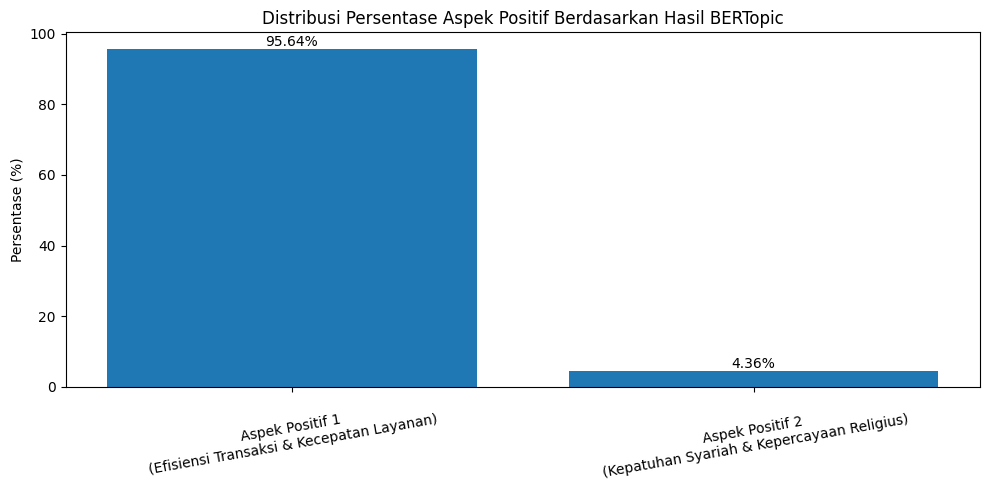

In [ ]:
import matplotlib.pyplot as plt

# === DATA TOPIK POSITIF (tanpa topik -1) ===
topic_counts = {
    "Aspek Positif 1\n(Efisiensi Transaksi & Kecepatan Layanan)": 1755,   # Topic 0
    "Aspek Positif 2\n(Kepatuhan Syariah & Kepercayaan Religius)": 80    # Topic 1
}

# === HITUNG PERSENTASE ===
total = sum(topic_counts.values())
percentages = {k: (v / total) * 100 for k, v in topic_counts.items()}

# === VISUALISASI DIAGRAM BATANG ===
plt.figure(figsize=(10, 5))

bars = plt.bar(
    list(percentages.keys()),
    list(percentages.values())
)

# Label
plt.ylabel("Persentase (%)")
plt.title("Distribusi Persentase Aspek Positif Berdasarkan Hasil BERTopic")
plt.xticks(rotation=10)

# Tambahkan label persentase di atas batang
for bar, perc in zip(bars, percentages.values()):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{perc:.2f}%",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

## Negatif

In [ ]:
# Load CSV lokal
file_path = "/content/label_indobert_tiktok.csv"  # pastikan path sesuai lokasi file
df = pd.read_csv(file_path)
df.head()

,comment,case_folding,cleaning,normalisasi,tokenisasi,stopword_removal,stemming,score,sentiment_label,sentiment_encoded,bert_encoded,bert_label
0,"gedung elit, jaringan sulit.","gedung elit, jaringan sulit.",gedung elit jaringan sulit,gedung elit jaringan sulit,"['gedung', 'elit', 'jaringan', 'sulit']","['gedung', 'elit', 'jaringan', 'sulit']","['gedung', 'elit', 'jaring', 'sulit']",1,Positif,1,1,positif
1,mau ngeluh tapi cuman satu satunya bank syaria...,mau ngeluh tapi cuman satu satunya bank syaria...,mau ngeluh tapi cuman satu satunya bank syaria...,mau ngeluh tapi cuma satu satunya bank syariah...,"['mau', 'ngeluh', 'tapi', 'cuma', 'satu', 'sat...","['ngeluh', 'satunya', 'syariah', 'bumn']","['ngeluh', 'satu', 'syariah', 'bumn']",-1,Negatif,0,0,negatif
2,tim yg masih punya apk BSI lama😂😂😂😂,tim yg masih punya apk bsi lama😂😂😂😂,tim yg masih punya apk bsi lama,tim yang masih punya aplikasi bsi lama,"['tim', 'yang', 'masih', 'punya', 'aplikasi', ...","['tim', 'aplikasi']","['tim', 'aplikasi']",-2,Negatif,0,0,negatif
3,"gw punya uang 2M lebih,ga percaya bank manapun...","gw punya uang 2m lebih,ga percaya bank manapun...",gw punya uang m lebihga percaya bank manapunma...,gue punya uang sama lebihga percaya bank manap...,"['gue', 'punya', 'uang', 'sama', 'lebihga', 'p...","['gue', 'uang', 'lebihga', 'percaya', 'manapun...","['gue', 'uang', 'lebihga', 'percaya', 'manapun...",-1,Negatif,0,0,negatif
4,semoga bank konfensional kembali membuka caban...,semoga bank konfensional kembali membuka caban...,semoga bank konfensional kembali membuka caban...,semoga bank konfensional kembali membuka caban...,"['semoga', 'bank', 'konfensional', 'kembali', ...","['semoga', 'konfensional', 'membuka', 'cabangn...","['moga', 'konfensional', 'buka', 'cabang', 'ac...",1,Positif,1,1,positif


In [ ]:
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# --- stopword dasar dari Sastrawi ---
factory = StopWordRemoverFactory()
base_stopwords = set(factory.get_stop_words())

# --- stopword tambahan untuk data TikTok (super lengkap) ---
extra_stopwords = {
    # kata panggilan
    "kak", "kakak", "bang", "bro", "sis", "bos", "min", "admin",

    # nama aplikasi & banking
    "bsi", "byond", "beyond", "wondr", "bni", "mbanking", "mobile", "bank", "byondbybsi", "beyondbsii",

    # kata bantu umum yang tidak bermakna topik
    "bisa", "tidak", "ga", "gak", "gk", "nggak", "ngga", "enggak",
    "iya", "kayak", "gua", "gue", "aku", "kamu", "anda", "mereka",
    "saya", "mau", "udah", "lagi", "yang", "dengan", "agar", "jadi",

    # kata noise umum TikTok
    "anjir", "anjay", "banget", "parah", "loh", "lah", "kok", "sih",
    "wkwk", "wkwkwk", "hehe", "haha", "hmm",

    # corporate / lokasi bias
    "tbk", "pt", "aceh", "indonesia",

    # Tambahan kata umum lainnya
    "hari", "kalau", "cont", "silakan", "lalu", "menggunakan", "pastikan", "restart", "selalu", "playstore", "appstore", "berbagi", "keren", "bekerjasama", "outlet", "dilihat", "terupdate", "bagaimana",
    "berhatihati", "jaga", "mengatasnamakan", "mohon", "versi", "pribadi", "syariah", "paham", "jadi", "berkah", "ikutan", "icon", " jawabannya", "logo", " ialah", "update", "coba", "melakukan", "baca",
    "waalaikumsalam", " kuisnya", "minsy", "kali", "mluu", "mint", "enih", "guys", "info", "begini", "mohon", "kata", "terbaru", "memberikan", "pihak", "waspada", "himbau", "stabil", "overlapping",
    "menjaga", "keharasiaan", "manapun", " ", "diperbarui", "terlebih", "kuis", "jawaban", "follow", "rezeki", "bestie", "pahamjadiberkah", "jangan", "klik", "link", "resmi", "benar", "menindaklanjuti",
    "trosss", "annnnn", "iniiii", "right", "tross", "kepri", "bjir", "mandiri", "pindah", "kotabaru", "memang",
}

# gabungkan semua stopword
all_stopwords = base_stopwords.union(extra_stopwords)

# --- CLEANING SUPER KOMPREHENSIF UNTUK BERTopic ---
def clean_bertopic(text):
    text = str(text).lower()

    # hapus URL, @mention, hashtag
    text = re.sub(r"http\S+|www\S+|@\w+|#\w+", " ", text)

    # hapus karakter selain huruf/angka/spasi
    text = re.sub(r"[^a-zA-Z0-9\s]", " ", text)

    # hapus kata 1–3 huruf (mengurangi bias X)
    text = re.sub(r"\b\w{1,3}\b", " ", text)

    # stopword filter
    tokens = [w for w in text.split() if w not in all_stopwords]

    return " ".join(tokens).strip()

In [ ]:
df_negatif["clean_text"] = df_negatif["normalisasi"].apply(clean_bertopic)
df_negatif[["normalisasi", "clean_text"]].head()

,normalisasi,clean_text
1,mau ngeluh tapi cuma satu satunya bank syariah...,ngeluh cuma satu satunya bumn
2,tim yang masih punya aplikasi bsi lama,punya aplikasi lama
3,gue punya uang sama lebihga percaya bank manap...,punya uang sama lebihga percaya manapunmakanya...
5,gara gara kau bsi gagal beli oleh kena beban m...,gara gara gagal beli kena beban moral sanggup ...
6,sejak pakai bsi nih ketar ketir tb tidak bisa ...,sejak pakai ketar ketir tarik ketenangan makek


In [ ]:
# 5. EMBEDDING MODEL TERBAIK
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer("paraphrase-multilingual-mpnet-base-v2")

In [ ]:
# 6. BERTopic MODEL

topic_model = BERTopic(
    embedding_model=embedding_model,
    language="indonesian",
    min_topic_size=80,     # cluster minimal agar topik stabil
    nr_topics="5"       # otomatis menentukan jumlah topik
)

topics, probs = topic_model.fit_transform(df_negatif["clean_text"])

df_negatif["topic"] = topics

In [ ]:
# 7. TOPIC INFO

topic_info = topic_model.get_topic_info()
topic_info

,Topic,Count,Name,Representation,Representative_Docs
0,-1,203,-1_bahasa_anjing_ubah_cara,"[bahasa, anjing, ubah, cara, sakit, nama, ingg...","[cara ubah bahasa inggris, cara ubah bahasa ba..."
1,0,4728,0_akun_uang_masuk_pakai,"[akun, uang, masuk, pakai, transfer, sama, mas...",[transfer uang uang masuk transaksi rekening m...
2,1,943,1_error_aplikasi_lama_terus,"[error, aplikasi, lama, terus, pakai, sering, ...","[sering error aplikasi, aplikasi error, aplika..."
3,2,99,2_verifikasi_wajah_gagal_terus,"[verifikasi, wajah, gagal, terus, mata, wajahn...","[gagal verifikasi wajah, gagal verifikasi waja..."


In [ ]:
# 8. PRINT KEYWORDS PER TOPIK

print("=== Keywords for All Topics ===")
for topic_id in topic_info["Topic"]:
    if topic_id == -1:   # skip outlier jika mau
        continue
    print(f"\nTOPIC {topic_id}")
    print(topic_model.get_topic(topic_id))

=== Keywords for All Topics ===

TOPIC 0
[('akun', np.float64(0.07354671835315356)), ('uang', np.float64(0.06833102900576354)), ('masuk', np.float64(0.06324127274842002)), ('pakai', np.float64(0.05480775705962823)), ('transfer', np.float64(0.050216932923332756)), ('sama', np.float64(0.04280268650053934)), ('masalah', np.float64(0.039652507181218155)), ('rekening', np.float64(0.034544056730341846)), ('nomor', np.float64(0.031107963981327348)), ('buat', np.float64(0.03108196796991498))]

TOPIC 1
[('error', np.float64(0.2869015838212208)), ('aplikasi', np.float64(0.22547997260365932)), ('lama', np.float64(0.09015780849781013)), ('terus', np.float64(0.06754514906423764)), ('pakai', np.float64(0.06378490377230546)), ('sering', np.float64(0.05773369333489434)), ('mulu', np.float64(0.05720027376055419)), ('download', np.float64(0.053978930557550625)), ('baru', np.float64(0.03917222198219164)), ('close', np.float64(0.03736883309550622))]

TOPIC 2
[('verifikasi', np.float64(0.46224157546507166)

In [ ]:
# 1. Define custom topic names (lebih jelas & sesuai makna topik)
custom_labels = {
    0: "Kendala Akses Akun & Transaksi",
    1: "Stabilitas Aplikasi & Performa Sistem",
    2: "Verifikasi Wajah & Keamanan Akun"
}

# 2. Terapkan nama baru ke topic model
topic_model.set_topic_labels(custom_labels)

# 3. Print topik & keywords setelah rename
print("\n=== TOPIK & KEYWORDS SETELAH RENAME ===")
for topic_id, keywords in topic_model.get_topics().items():
    if topic_id == -1:
        continue
    print(f"\nTOPIC {topic_id} — {custom_labels[topic_id]}")
    print(keywords)

# 4. MAPPING KE ASPEK PENELITIAN (mengikuti aspek yang saya rekomendasikan)
aspek_mapping = {
    0: "Aspek 1: Kendala Akses Akun & Transaksi",
    1: "Aspek 2: Stabilitas Aplikasi & Performa Sistem",
    2: "Aspek 3: Verifikasi Identitas & Keamanan Akun"
}

print("\n=== ASPEK PER TOPIK ===")
for topic_id, aspek in aspek_mapping.items():
    print(f"TOPIC {topic_id} → {aspek}")


=== TOPIK & KEYWORDS SETELAH RENAME ===

TOPIC 0 — Kendala Akses Akun & Transaksi
[('akun', np.float64(0.07354671835315356)), ('uang', np.float64(0.06833102900576354)), ('masuk', np.float64(0.06324127274842002)), ('pakai', np.float64(0.05480775705962823)), ('transfer', np.float64(0.050216932923332756)), ('sama', np.float64(0.04280268650053934)), ('masalah', np.float64(0.039652507181218155)), ('rekening', np.float64(0.034544056730341846)), ('nomor', np.float64(0.031107963981327348)), ('buat', np.float64(0.03108196796991498))]

TOPIC 1 — Stabilitas Aplikasi & Performa Sistem
[('error', np.float64(0.2869015838212208)), ('aplikasi', np.float64(0.22547997260365932)), ('lama', np.float64(0.09015780849781013)), ('terus', np.float64(0.06754514906423764)), ('pakai', np.float64(0.06378490377230546)), ('sering', np.float64(0.05773369333489434)), ('mulu', np.float64(0.05720027376055419)), ('download', np.float64(0.053978930557550625)), ('baru', np.float64(0.03917222198219164)), ('close', np.float

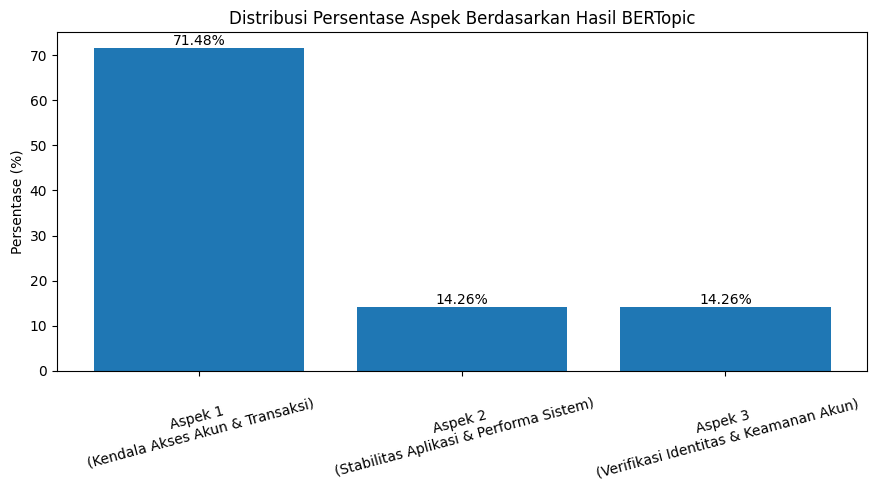

In [ ]:
import matplotlib.pyplot as plt

# === DATA TOPIK (tanpa topik -1) ===
topic_counts = {
    "Aspek 1\n(Kendala Akses Akun & Transaksi)": 4728,       # Topic 0
    "Aspek 2\n(Stabilitas Aplikasi & Performa Sistem)": 943, # Topic 1
    "Aspek 3\n(Verifikasi Identitas & Keamanan Akun)": 943   # Topic 2
}

# === HITUNG PERSENTASE ===
total = sum(topic_counts.values())
percentages = {k: (v / total) * 100 for k, v in topic_counts.items()}

# === VISUALISASI DIAGRAM BATANG ===
plt.figure(figsize=(9, 5))

bars = plt.bar(
    list(percentages.keys()),
    list(percentages.values())
)

# Label
plt.ylabel("Persentase (%)")
plt.title("Distribusi Persentase Aspek Berdasarkan Hasil BERTopic")
plt.xticks(rotation=15)

# Tambahkan label persentase di atas batang
for bar, perc in zip(bars, percentages.values()):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{perc:.2f}%",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()